In [1]:
import pickle
import pandas as pd
# from CITEsort.BTreeTraversal import BTreeTraversal
# from CITEsort.Visualize import plot_keymarker,visualize_tree
from Classifier.BTreeTraversal import BTreeTraversal
from Classifier.Visualize import plot_keymarker,visualize_tree
import matplotlib
#import numpy as np
from matplotlib import pyplot as plt

## load data and tree 

In [271]:
# data = pd.read_csv('datasets/SeuratV4/adt_main_clr.csv',header=0,index_col=0)

# data = pd.read_csv('./datasets/SeuratV4/adt_p8_main_clr.csv',header=0,index_col=0)
id ='4_5/t3p2'
# data = pd.read_csv('../data/4tumor/subdata/ADT_'+id+'.csv',index_col=0)
# data = pd.read_csv('../simulator_out/ADT_simulator_'+id+'.csv',index_col=0)
data = pd.read_csv('../SeuratV4/subdata/'+id+'_ADT.csv', sep=',',index_col=0, header=0)
# data.index = data.index.astype(str)
id='7_5/new_10'
f = open('../output/'+id+'/tree.pickle','rb')
# f = open('../data/4tumor/output/ADT_'+id+'/tree.pickle','rb')
# true = pd.read_csv('./data/4tumor/gating_cluster.csv',index_col=0)
# f = open('CITEsort_out/SeuratV3_main_ct_smooth2/tree.pickle','rb')
tree = pickle.load(f)
f.close()
traversal = BTreeTraversal(tree)

## plot compact tree or complete tree
#### The paramter '--compact' of runing runCITEsort.py will set the tree in compact format. If complete format is needed, plot tree again as below. The filename should no longer be 'tree', or the original tree.pdf will be overwritten.

In [ ]:
# visualize_tree(tree,data,outpath='./CITEsort_out',filename='tree_complete',compact=False)

In [137]:
import numpy as np
def smooth(x,item=0,num=6):
    if x.iloc[0,:].any() < 0:
    # i = [i for i in item][0]
    # print(i,value[:5])
    # print(value[0],value[1])
        x = x.apply(np.expm1)

    # print('before',(x.isnull()).any())
    for i in x.columns:
        value = np.unique(x.loc[:,i].values.tolist())
        num = min(len(value),num)
        x.loc[:,i] += np.random.normal(loc=0, scale=1,size=x.shape[0]) * 0.01
        # for k in range(num-1):
        #     # print(x.loc[x.loc[:,i]==value[k],i])
        #     x.loc[x.loc[:,i]==value[k],i] += np.random.normal(loc=0, scale=1, size=sum(x.loc[:,i]==value[k])) * (value[k+1]-value[k])*0.1
        # print(i,':',len(value))

    y = np.apply_along_axis(lambda x: np.log(x+1) - np.mean(np.log(x+1)),0,x)
    x = pd.DataFrame(y, index=x.index, columns=x.columns)
    x.mask(x.isnull(),0)
    # print('after',(x.isnull()).any())
    return x


In [272]:
data_ = smooth(data)

## visualize all markers in a certain node
#### the node ID is just the number before the node name in tree.pdf

artificial


KeyError: 'bp_ncluster'

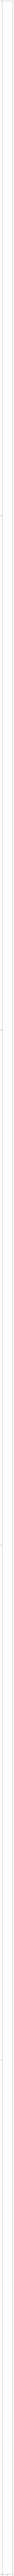

In [274]:
node_ID = 12
traversal.plot_node(data_,node_ID,viz_dim=1)

In [276]:
node = traversal.get_node(12)
node.all_clustering_dic[1][('CD25',)]#['similarity_stopped'][('CD4-2',)]
# len(node.indices)
node.score_dict
# node.stop
# node.artificial_w

KeyError: ('CD25',)

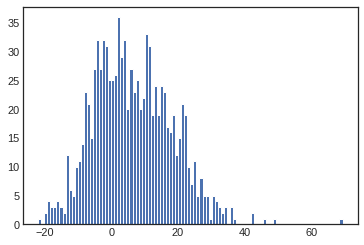

In [39]:
plt.hist(node.artificial_w,bins=100)
plt.show()

In [134]:
import scanpy as sc
rnadata = sc.read_h5ad('../SeuratV4/subdata/4_41_RNA.h5ad')

In [116]:
# tempnode = node


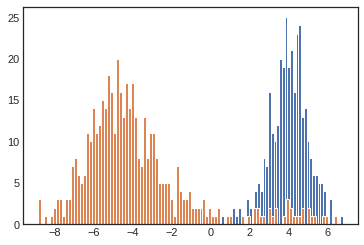

2.7750340075012225 -3.8970689871915143


In [135]:
# from sklearn.preprocessing import normalize
# node = tempnode
adata = rnadata[node.indices,:].copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
w = pd.read_csv('../output/7_4_0/retrian_embedding.csv',index_col=0)
new_embedding = np.dot(adata.X.toarray(), w)
new_embedding = pd.Series(new_embedding[:,-2],index=adata.obs_names)
# plt.hist(new_embedding[node.indices],bins=100)
plt.hist(new_embedding[node.left_indices],bins=100)
plt.hist(new_embedding[node.right_indices],bins=100)
# plt.hist(node.artificial_w,bins=100)
# plt.hist(node.artificial_w[node.left_indices],bins=100)
# plt.hist(node.artificial_w[node.right_indices],bins=100)

# sc.pp.highly_variable_genes(adata,min_disp=0.5)
# adata = adata[:,adata.var.highly_variable]
# # print(adata.shape)
# sc.pp.scale(adata)
# sc.pp.pca(adata, n_comps=100)
# ppdata = adata.obsm['X_pca'].T
# temp = normalize(ppdata[:5,:].T,copy=True)
# plt.scatter(ppdata[0,:],ppdata[1,:],s=1,c=pred0, cmap='viridis')
plt.show()
print(new_embedding[node.left_indices].mean(),new_embedding[node.right_indices].mean())

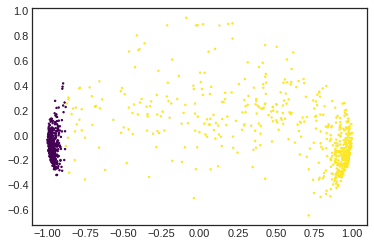

In [35]:
# temp = normalize(ppdata[:5,:].T,copy=True)
# plt.hist(temp[:,0],bins=100)
plt.scatter(temp[:,0],temp[:,1],s=2,c=pred1, cmap='viridis')
plt.show()
# temp[0,:]

In [24]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
pred0 = gmm.fit_predict(ppdata[0,:].reshape(-1,1))
pred1 = gmm.fit_predict(temp[:,0].reshape(-1,1))

In [178]:
id='7_5/_0'
f = open('../output/'+id+'/tree.pickle','rb')
tree = pickle.load(f)

embedding = pd.DataFrame(index=rnadata.var_names)
def dfs_embedding(node,ind):
    ind  = ind + 1
    if node.key != ('leaf',):
        embedding[ind] = 0
        embedding.loc[node.artificial_w.index,ind] = node.artificial_w
        # ind += 1
        ind = dfs_embedding(node.left, ind)
        ind = dfs_embedding(node.right, ind)
    return ind
dfs_embedding(tree,ind=0)
embedding.to_csv('../output/7_5/_0/embedding.csv')

In [64]:
embedding

{None: YWHAQ         0.239787
 AC109454.2    0.012607
 SLC16A10     -0.043307
 PABPC1        0.110716
 TBL2         -0.003940
                 ...   
 NUCB2        -0.143171
 AP3M2         0.421663
 S100A6       -0.003046
 NACA         -0.215795
 GAPDH         0.255436
 Length: 629, dtype: float32}

In [87]:
import scanpy as sc
rnadata = sc.read_h5ad('../SeuratV4/subdata/4_31_RNA.h5ad')

In [116]:
import matplotlib.pyplot as plt
node = traversal.get_node(8)

# plt.hist(node.embedding,bins=100)
# plt.hist(x[:,0],bins=100,alpha=0.3)
subdata = rnadata[rnadata.obs['label_l2'].isin(['CD4 Naive','CD4 TCM'])]

plt.hist(node.embedding.iloc[rnadata[rnadata.obs['label_l2']=='CD4 TCM'].obs_names,0],bins=200)
plt.hist(node.embedding.iloc[rnadata[rnadata.obs['label_l2']=='CD4 Naive'].obs_names,0],bins=100)#node.embedding.iloc[:,0]
plt.show()

AttributeError: 'list' object has no attribute 'iloc'

In [72]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2)
# l = gm.fit_predict(np.array(node.embedding.iloc[:,0]).reshape(-1,1))
l = gm.fit_predict(x[:,0].reshape(-1,1))
sum(l)

506

In [71]:
from Classifier.adtReSplit import BIC, outlier_filter
from Classifier.adtReSplit import smooth as sm
from sklearn.preprocessing import normalize
raw = pd.DataFrame(node.embedding)
# x = sm(raw) #np.array(node.embedding.iloc[:,0]).reshape(-1,1)
x = normalize(node.embedding)
# x, _ = outlier_filter(node.embedding)
# k_bic,_ = BIC(np.array(node.embedding.iloc[:,0]).reshape(-1,1),10)
# k_bic,_ = BIC(np.array(x.iloc[:,0]).reshape(-1,1),10)
k_bic,_ = BIC(np.array(x[:,0]).reshape(-1,1),10)

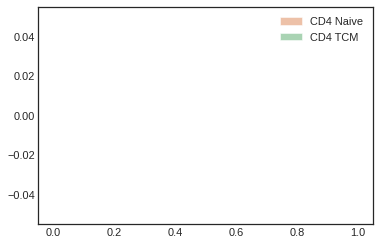

In [119]:
nodeID = 8
node = traversal.get_node(nodeID)
x = node.artificial_w.loc[set(node.left_indices)&set(node.artificial_w.index)]
y = node.artificial_w.loc[set(node.right_indices)&set(node.artificial_w.index)]
z = node.artificial_w.loc[set(node.indices)&set(node.artificial_w.index)]
# w = node.artificial_w.loc[traversal.get_node(6).indices]


plt.hist(z,bins=100,alpha=0.1)

plt.hist(x,bins=100,alpha=0.5, label='CD4 Naive')
plt.hist(y,bins=100,alpha=0.5,label='CD4 TCM')
# plt.hist(w,bins=100,alpha=0.2, label='T')
plt.legend()
plt.show()

In [126]:
import scanpy as sc
rnadata = sc.read_h5ad('../SeuratV4/subdata/4_33_RNA.h5ad')
# rnadata = sc.read_h5ad('../data/4tumor/subdata/RNA_'+id+'.h5ad')
rnadata.var_names_make_unique()
sc.pp.normalize_total(rnadata, target_sum=1e4)
sc.pp.log1p(rnadata)
nodeID = 8
node = traversal.get_node(nodeID)
x = np.dot(rnadata[node.left_indices,node.artificial_w.index].X.toarray(),node.artificial_w)
y = np.dot(rnadata[node.right_indices,node.artificial_w.index].X.toarray(),node.artificial_w)
# x = np.dot(rnadata[node.left_indices,node.artificial_w.index].X.toarray(),w0.T)
# y = np.dot(rnadata[node.right_indices,node.artificial_w.index].X.toarray(),w0.T)
# z = np.dot(rnadata[traversal.get_node(6).indices,node.artificial_w.index].X.toarray(),node.artificial_w)


plt.hist(x,bins=100,alpha=0.5,label='CD3-')
plt.hist(y,bins=100,alpha=0.5,label='CD3+')
# plt.hist(z,bins=100,alpha=0.5,label='CD14 Mono')

plt.legend()
plt.show()

KeyError: "Values ['L1_AAACGCTAGGATATGT', 'L1_AACAACCTCACAAGGG', 'L1_AACCAACTCTCGTCGT', 'L1_AACCCAAAGCTTCTAG', 'L1_AACCCAAAGGATCATA', 'L1_AACGAAACAAAGGCAC', 'L1_AAGGTAAGTTCTCCCA', 'L1_AATAGAGCAATCAGCT', 'L1_AATGGAACACATAGCT', 'L1_AATTCCTCAGTAACGG', 'L1_AATTTCCGTCACCGAC', 'L1_ACACCAAGTGGTTTGT', 'L1_ACACCAATCAACCGAT', 'L1_ACATTTCGTATCGCAT', 'L1_ACCGTTCCATAGAGGC', 'L1_ACCTACCAGAACCGCA', 'L1_ACGGTCGAGGCAGGTT', 'L1_ACGTAACAGAAGTATC', 'L1_ACGTCCTGTCAAGGCA', 'L1_AGACAAACAGGGATAC', 'L1_AGACACTAGCCGGATA', 'L1_AGACAGGGTGGCAGAT', 'L1_AGCATCAAGTTCCGTA', 'L1_AGCGATTGTGCGGTAA', 'L1_AGGACGAGTTGCTGAT', 'L1_AGGAGGTTCCTCTAAT', 'L1_AGGCATTGTAACAAGT', 'L1_AGGGCCTAGCTAGAGC', 'L1_AGGGCTCAGAGCTTTC', 'L1_AGGTCATCACAGACGA', 'L1_AGGTTGTGTGGCTAGA', 'L1_AGTACCAGTTTGAAAG', 'L1_AGTGATCCACTGAGGA', 'L1_AGTTCCCGTTTCCATT', 'L1_ATAGAGACAGGCCTGT', 'L1_ATAGGCTAGAAACTGT', 'L1_ATAGGCTTCGGCTGTG', 'L1_ATCGGATAGGAGCTGT', 'L1_ATCGGATGTCGAGTGA', 'L1_ATCGGCGGTGGCGCTT', 'L1_ATCGTCCGTGCGGTAA', 'L1_ATGAGTCGTCGTTGCG', 'L1_ATGCCTCAGTACAGAT', 'L1_ATGCGATGTCTGATAC', 'L1_ATGGAGGCACGAGGAT', 'L1_ATGGATCGTATCAAGA', 'L1_ATGGTTGCACACAGAG', 'L1_ATTACTCCAAAGCAAT', 'L1_ATTACTCGTCTGCCTT', 'L1_ATTCCATGTACCCGCA', 'L1_ATTCGTTAGTAGTCAA', 'L1_ATTCTTGGTGTCTTGA', 'L1_ATTTCTGAGGATACGC', 'L1_CAATTTCCAGACACCC', 'L1_CACCAAAGTCCTTGTC', 'L1_CACGTTCTCTGTCCCA', 'L1_CACTAAGTCAAGCCAT', 'L1_CACTGAAAGTTGAATG', 'L1_CACTGAATCGAAACAA', 'L1_CAGTGCGGTCTCACGG', 'L1_CATCAAGTCAGACAAA', 'L1_CATCCACCATGCAGCC', 'L1_CATCCACGTTTCGGCG', 'L1_CATGGATCAGACATCT', 'L1_CATTCCGAGTGCGCTC', 'L1_CATTGTTCAAAGGGCT', 'L1_CCCTAACAGCGAACTG', 'L1_CCCTCAATCACGTCCT', 'L1_CCCTGATTCGACCACG', 'L1_CCGATGGGTAACTGCT', 'L1_CCGTGAGTCTCGCTCA', 'L1_CCTCAACTCTTGCAAG', 'L1_CCTCAGTGTTCATCTT', 'L1_CCTCTCCCAGCGCGTT', 'L1_CCTGTTGAGAGTCTTC', 'L1_CGATCGGAGATCCGAG', 'L1_CGATGGCCAACGGCCT', 'L1_CGCAGGTAGCACCGAA', 'L1_CGGTCAGAGCAAGGAA', 'L1_CGTGCTTTCACGAACT', 'L1_CTACTATGTACCCACG', 'L1_CTCAAGACAAACTAGA', 'L1_CTCATCGTCGTGGGAA', 'L1_CTCCAACTCGTACCTC', 'L1_CTCTCGATCGCGTGCA', 'L1_CTGGTCTAGGCCGCTT', 'L1_CTGTACCGTCGATTCA', 'L1_CTTGAGATCGCAATGT', 'L1_CTTGATTGTCAATCTG', 'L1_GAAGAATAGACTCCGC', 'L1_GAAGAATTCATCGACA', 'L1_GAAGAATTCTTTACAC', 'L1_GAAGCCCCAGGTGGAT', 'L1_GAAGCCCTCACTCCGT', 'L1_GAATCACGTTAGGACG', 'L1_GACATCATCTCCTACG', 'L1_GACCCTTCATAGAATG', 'L1_GACCGTGTCGCGAAGA', 'L1_GACCTTCAGCTGTACT', 'L1_GACGTTACAGAACGCA', 'L1_GAGAGGTGTCCTCCAT', 'L1_GAGGCAAAGGTCTGGA', 'L1_GAGTTGTAGGTCCTGC', 'L1_GATAGCTCAAGACAAT', 'L1_GATCACATCTGGCCGA', 'L1_GATCAGTGTTGCCATA', 'L1_GCACATAGTAAGGCCA', 'L1_GCATCGGCAAGTCATC', 'L1_GCCAACGAGGTTCTTG', 'L1_GCCAACGGTAGGCTGA', 'L1_GCCCGAATCATCCTGC', 'L1_GCCGATGGTAGTCACT', 'L1_GCGTGCATCCCTCTCC', 'L1_GCTACAAGTACGATGG', 'L1_GCTGAATTCGGTTAGT', 'L1_GCTTCACGTTTGGAGG', 'L1_GCTTGGGCAGCACGAA', 'L1_GGAGAACCATCGGCCA', 'L1_GGATGTTGTGGCAACA', 'L1_GGCTGTGAGAGTCTGG', 'L1_GGCTTTCTCCAGCAAT', 'L1_GGGACCTAGCCTCAGC', 'L1_GGGAGATTCCCATAGA', 'L1_GGTCTGGCAAGATGTA', 'L1_GGTGTTAGTGCCCACA', 'L1_GGTTGTACAACGACAG', 'L1_GTACAACCAACTGATC', 'L1_GTAGAAAAGTCATGGG', 'L1_GTAGGTTTCTCAATCT', 'L1_GTCACGGGTATAGGGC', 'L1_GTCAGCGTCACTCACC', 'L1_GTCATGATCAGGAGAC', 'L1_GTCCCATTCATGAGTC', 'L1_GTCCTCATCATTTCGT', 'L1_GTCGAATAGGGTAGCT', 'L1_GTGAGCCTCCAAGCTA', 'L1_GTGATGTCATTAAAGG', 'L1_GTGTGATAGGCCCACT', 'L1_GTTAGACGTTACGCCG', 'L1_GTTGCTCAGACCAAGC', 'L1_TACCCGTGTGATAGTA', 'L1_TAGACCAGTCTGCATA', 'L1_TAGAGTCGTACCGGCT', 'L1_TAGGGTTCACAACGTT', 'L1_TATATCCCAATTAGGA', 'L1_TATTGCTTCTATACGG', 'L1_TATTTCGCAAGAGGTC', 'L1_TATTTCGTCGGCATTA', 'L1_TCAAGACAGTCAACAA', 'L1_TCAATCTCACCCTAAA', 'L1_TCACGGGGTCCCACGA', 'L1_TCATATCCACTTTATC', 'L1_TCATGCCCAAAGCTCT', 'L1_TCATTGTTCACGGGAA', 'L1_TCATTTGTCACCGGGT', 'L1_TCCGTGTCACAGTCCG', 'L1_TCCTGCAAGCTATCTG', 'L1_TCCTGCACAAGTCGTT', 'L1_TCGTGCTCAAATAGCA', 'L1_TCTAACTCATCGCCTT', 'L1_TGAGACTTCGCCAGTG', 'L1_TGATCAGGTGGAACCA', 'L1_TGCATGAGTCTCTCAC', 'L1_TGCGATAGTTTCCCAC', 'L1_TGGATGTCATGGAGAC', 'L1_TGTTTGTGTACAGTTC', 'L1_TTACGTTTCTCCGCAT', 'L1_TTAGGGTTCAAGTCGT', 'L1_TTAGGGTTCTGTGCTC', 'L1_TTCCAATAGTCGGGAT', 'L1_TTCGGTCAGCTCCCTT', 'L1_TTCTAGTCACTTGTCC', 'L1_TTGACCCAGAGGACTC', 'L1_TTGGGATCAATTGTGC', 'L1_TTGGTTTGTCAAGGCA', 'L1_TTGTTGTGTGATTAGA', 'L1_TTGTTTGCAATGGCAG', 'L1_TTTACCACAGAACCGA', 'L1_TTTCACACAGTGTGCC', 'L1_TTTCGATTCTTCCGTG', 'L1_TTTGTTGCATGCCGGT', 'L2_AAACCCAAGACCGTTT', 'L2_AAACCCACAGTTGTCA', 'L2_AAACGAAAGACTCCGC', 'L2_AACAACCAGAGCTTTC', 'L2_AACGGGAAGATAGCAT', 'L2_AACTTCTGTGCCAAGA', 'L2_AAGTGAAGTCCCGCAA', 'L2_AATCGTGCAGAGTGTG', 'L2_AATGAAGTCCATATGG', 'L2_AATGCCACAGACCGCT', 'L2_ACACTGACATAAGATG', 'L2_ACAGCCGCATCTAGAC', 'L2_ACATTTCTCGAGAATA', 'L2_ACCAAACTCTGTAACG', 'L2_ACCTGAACAACGTAAA', 'L2_ACGCACGAGGCGTTGA', 'L2_ACGTAGTGTATTGAGA', 'L2_ACGTTCCTCTAGTGTG', 'L2_ACTCTCGCACATTGTG', 'L2_ACTGCAAGTTAGCGGA', 'L2_ACTGTGAAGGGCTAAC', 'L2_ACTTCCGTCTACTTCA', 'L2_ACTTCGCAGAGTGGCT', 'L2_AGAAATGTCCCGTAAA', 'L2_AGAGAATCAGACACCC', 'L2_AGAGCAGAGAGTTGTA', 'L2_AGAGCCCGTCGGAAAC', 'L2_AGCATCACACAGCCTG', 'L2_AGCGCTGCACACACGC', 'L2_AGCGCTGTCCGCTGTT', 'L2_AGGACGACACTACGGC', 'L2_AGGATCTCAGGACATG', 'L2_AGGATCTTCTCCGAAA', 'L2_AGTCACATCCAATCCC', 'L2_AGTGCCGTCTTCGCTG', 'L2_AGTTAGCAGCGGCTCT', 'L2_ATAGAGAAGTTGCCCG', 'L2_ATAGGCTAGAGGTGCT', 'L2_ATCACGATCCACCTGT', 'L2_ATCCGTCTCCGTAATG', 'L2_ATCGGATTCCAGGACC', 'L2_ATGAGTCTCACATTGG', 'L2_ATGATCGGTAACACCT', 'L2_ATGATCGGTCCTATAG', 'L2_ATGATCGTCAAACCTG', 'L2_ATGGAGGCAAACCACT', 'L2_ATTACCTAGCAGGCAT', 'L2_ATTACCTGTTGGATCT', 'L2_ATTCACTTCGCACGGT', 'L2_ATTCCCGAGTCGTCTA', 'L2_ATTCCCGCAAACTGCT', 'L2_ATTCCTACAAACCACT', 'L2_ATTCCTATCGCTTGAA', 'L2_ATTTACCAGCTACAAA', 'L2_CAACCAACAAATGAGT', 'L2_CAACCAACAGGGTTGA', 'L2_CAACGATGTGCCTGCA', 'L2_CAACGGCTCTGGGCGT', 'L2_CACAGGCGTAGATGTA', 'L2_CACGGGTCACATTACG', 'L2_CACGTTCGTCAGTTTG', 'L2_CACTGAAGTTTACCAG', 'L2_CAGAGCCTCCGTGCGA', 'L2_CAGATTGTCAGCTAGT', 'L2_CAGCACGTCTCCAATT', 'L2_CAGGGCTAGTCTTGGT', 'L2_CAGTTAGAGGTCCGAA', 'L2_CATCAAGGTAGTGGCA', 'L2_CATCCGTCAACACACT', 'L2_CATGCCTGTTCAACGT', 'L2_CATGCGGGTCTGTGTA', 'L2_CATGGATTCTGGCCAG', 'L2_CATTGCCCACTGAGGA', 'L2_CCACCATGTGGGAGAG', 'L2_CCGCAAGTCATCTCTA', 'L2_CCGGTAGAGGTCGTAG', 'L2_CCTACGTCATTCGATG', 'L2_CCTCACACATCCCGTT', 'L2_CCTCATGCAAACTAAG', 'L2_CCTCTAGTCCCAGCGA', 'L2_CCTTGTGTCAAGATAG', 'L2_CGAGAAGTCGATACGT', 'L2_CGCATAAGTACTCAAC', 'L2_CGCGTGATCAACCTTT', 'L2_CGGGACTAGGGTGGGA', 'L2_CGTGATATCGTAACAC', 'L2_CGTGCTTCAAAGAGTT', 'L2_CGTTAGATCTCCTGAC', 'L2_CTAACCCTCCGCGAGT', 'L2_CTATCTATCCTTCACG', 'L2_CTCAGTCTCTACTGAG', 'L2_CTCCAACAGCTGACTT', 'L2_CTCCCTCTCAGTCACA', 'L2_CTCCGATAGTAAATGC', 'L2_CTGATCCGTCGGTGAA', 'L2_CTGCTCACACAGAAGC', 'L2_CTGGTCTAGACTACCT', 'L2_CTGTATTTCTGGTGGC', 'L2_CTTACCGTCTAGGAAA', 'L2_GAAACCTGTGTGCCTG', 'L2_GAAGCGAGTTGTGTTG', 'L2_GAAGGACCAGGTGTTT', 'L2_GAAGGACGTCTAATCG', 'L2_GAATCGTCATCCTATT', 'L2_GACAGCCCACCAAAGG', 'L2_GACCCTTCAACGACTT', 'L2_GACCTTCAGAAGTGTT', 'L2_GACCTTCGTTATCCAG', 'L2_GACGCTGAGGTCATCT', 'L2_GAGAAATCATGCCATA', 'L2_GAGACCCAGGTAGTAT', 'L2_GAGACTTGTTGACTAC', 'L2_GAGGCCTCACAGCTGC', 'L2_GAGTCTAGTGGCGCTT', 'L2_GATCATGAGTTACGTC', 'L2_GATCCCTTCCGTACGG', 'L2_GATTGGTTCTTAGCTT', 'L2_GCACATAGTCGCCTAG', 'L2_GCAGTTAGTAGCGCCT', 'L2_GCATCTCTCTTAGTTC', 'L2_GCATGATCAGTAACGG', 'L2_GCATGATTCAGTGATC', 'L2_GCATTAGGTCCTGGGT', 'L2_GCCAGTGAGCGTATGG', 'L2_GCCAGTGGTTTCCATT', 'L2_GCCCGAAAGTTAACGA', 'L2_GCCGTGAAGGCTATCT', 'L2_GCCTGTTCACGTCATA', 'L2_GCGGAAAAGTTGTAAG', 'L2_GCGTTTCCAGAGGCTA', 'L2_GCTGAATAGCCACTCG', 'L2_GGAGGATTCGCTTTAT', 'L2_GGCACGTGTCTTCCGT', 'L2_GGCACGTTCTACGGGC', 'L2_GGCGTCAAGAGATGCC', 'L2_GGCTTGGGTAAGCGGT', 'L2_GGGACAAAGGGCAACT', 'L2_GGGAGTACAAACACGG', 'L2_GGGATCCAGTTCAACC', 'L2_GGGCTCAAGGTCGTGA', 'L2_GGGTCTGCATCCGGCA', 'L2_GGTCTGGTCAAACTGC', 'L2_GTAACCAAGCATCAAA', 'L2_GTAGATCTCCGTGTCT', 'L2_GTAGGTTCAAGGACAC', 'L2_GTAGTACCATCCGGCA', 'L2_GTATTGGCAGGCTTGC', 'L2_GTCATCCTCTCTCTTC', 'L2_GTCGTTCGTGGCTACC', 'L2_GTCTACCAGAATCGCG', 'L2_GTGCGTGGTAGCTTAC', 'L2_GTGGAAGAGGTCTGGA', 'L2_GTGTGGCCAATGAACA', 'L2_GTGTGGCTCAGGACGA', 'L2_GTGTTAGTCATCTACT', 'L2_GTTACGAAGAATCGTA', 'L2_GTTGTGAGTATTGAGA', 'L2_TAAGCGTAGTCATAGA', 'L2_TAAGTCGCAGGGTCTC', 'L2_TACAACGAGAAGTCAT', 'L2_TACAACGTCGGTAGAG', 'L2_TACAGGTGTCTGGTTA', 'L2_TACCGGGTCCGGCTTT', 'L2_TACCTCGTCCGTTGGG', 'L2_TACGGGCCAACTGGTT', 'L2_TACTGCCTCATTTGCT', 'L2_TACTTACGTTGCTAGT', 'L2_TAGGAGGTCCTTATGT', 'L2_TAGTGCAAGGCCTAAG', 'L2_TATCTTGTCACGAACT', 'L2_TATCTTGTCGTTGTAG', 'L2_TCACACCCATCGCTCT', 'L2_TCATATCCATGAAAGT', 'L2_TCATTACTCAAAGCCT', 'L2_TCCGATCGTCAGTCGC', 'L2_TCCGATCGTTGCCATA', 'L2_TCCTCTTAGGTGAGAA', 'L2_TCCTGCAGTGGAGGTT', 'L2_TCGACGGGTATTCTCT', 'L2_TCGCTTGAGGCCTAAG', 'L2_TCTACATAGGACAACC', 'L2_TCTTGCGCATTATGCG', 'L2_TCTTTGACATTCGGGC', 'L2_TGACTCCTCGACTCCT', 'L2_TGAGGGACACCGGTCA', 'L2_TGATGGTTCTTACACT', 'L2_TGCAGATCAGCGCGTT', 'L2_TGCAGGCCAAATCGGG', 'L2_TGCATCCGTCGGTAAG', 'L2_TGCATGATCCATAGGT', 'L2_TGCTCGTCAGCAGTCC', 'L2_TGCTTCGCACAAGCCC', 'L2_TGGAGAGGTAATCAGA', 'L2_TGGCGTGAGCGCTTCG', 'L2_TGGGAGAAGCAGTAAT', 'L2_TGGGCTGCACTTCTCG', 'L2_TGGTACAGTTGTCTAG', 'L2_TGTTCATGTTATGTGC', 'L2_TGTTCTACAGGTTTAC', 'L2_TGTTTGTTCTTTGCAT', 'L2_TTAATCCGTACACGCC', 'L2_TTACCATTCTATCACT', 'L2_TTACGTTTCTCGTGAA', 'L2_TTCAGGAGTCGCTGCA', 'L2_TTCATTGTCACGAACT', 'L2_TTCCAATTCACATCAG', 'L2_TTCCGGTGTCGCACGT', 'L2_TTCTTCCTCTGGGTCG', 'L2_TTGACCCCAAATGGTA', 'L2_TTGACCCTCCGATGCG', 'L2_TTGGGATTCAGGAAGC', 'L2_TTGTTTGCAATGGCAG', 'L2_TTTACCACAGGTCAGA', 'L2_TTTAGTCCAAGGTTGG', 'L2_TTTCACAAGCCGAATG', 'L2_TTTCAGTTCGGACCAC', 'L2_TTTCCTCCAGATTCGT', 'L3_AAAGGGCGTGGTTTAC', 'L3_AAATGGATCACGTAGT', 'L3_AACACACAGAGCCTGA', 'L3_AACCACAAGAATTTGG', 'L3_AACCTGAGTTCGGCTG', 'L3_AAGCCATAGGTAGTAT', 'L3_AATGACCGTACGGTTT', 'L3_AATGGCTAGTTCCATG', 'L3_AATGGCTTCGACATAC', 'L3_ACGATGTAGCCTCTGG', 'L3_ACTATTCTCTCTATAC', 'L3_ACTTTCACAGAGTTGG', 'L3_AGAACCTAGATCCCGC', 'L3_AGCATCACAACCCTAA', 'L3_AGCTACATCCTTGAAG', 'L3_AGCTCAATCTCGACGG', 'L3_AGGATCTTCTTAGCTT', 'L3_AGGTTGTTCGACCCAG', 'L3_AGTACCAAGGGTGGGA', 'L3_AGTACTGAGTTGCTCA', 'L3_AGTCATGCACCTGCAG', 'L3_AGTCTCCGTCTCACGG', 'L3_ATACCGAAGTTGGCGA', 'L3_ATACCTTCAGATACTC', 'L3_ATCGCCTTCCCAGCGA', 'L3_ATCGTAGCATTCACCC', 'L3_ATCGTCCCAAGCGAAC', 'L3_ATGAAAGCAGGTTCAT', 'L3_ATGGAGGTCGTCACCT', 'L3_ATGGATCAGAAGCTGC', 'L3_ATGGGAGTCGAAACAA', 'L3_ATGGGTTGTAATGATG', 'L3_ATGGTTGAGACCTCCG', 'L3_ATTCCATAGGACGGAG', 'L3_ATTGTTCCAGGGTCTC', 'L3_ATTTACCCAATGTCTG', 'L3_CAACCAAGTTATAGCC', 'L3_CAAGGGACAGCGTATT', 'L3_CAATGACTCAGCTTCC', 'L3_CACCAAAGTGTTCGTA', 'L3_CAGAGCCTCAAGCCTA', 'L3_CATAAGCCATCACGGC', 'L3_CATAAGCTCGGCGATC', 'L3_CATACCCCATGCTGCG', 'L3_CATCGTCAGATGTTCC', 'L3_CATGCCTGTTAGTCGT', 'L3_CATTCCGCATGACTGT', 'L3_CCACCATAGCGTTCCG', 'L3_CCCGGAAGTTTAGACC', 'L3_CCCTCAAGTGCCGTAC', 'L3_CCGGTGAAGAAAGTCT', 'L3_CCTAACCCACTCAGAT', 'L3_CCTAACCTCAAAGAAC', 'L3_CCTAAGACAGCCCAGT', 'L3_CCTCATGTCTACAGGT', 'L3_CCTCCTCCATAGAGGC', 'L3_CCTGCATGTGGCTCTG', 'L3_CCTGTTGCATCTCCCA', 'L3_CGAAGGAAGACTCCGC', 'L3_CGACAGCTCCCGATCT', 'L3_CGCAGGTAGAGCATTA', 'L3_CGCATAAGTGCCAAGA', 'L3_CGCATGGCAGTGACCC', 'L3_CGGTCAGTCCACTGAA', 'L3_CGTAATGGTTCCGCGA', 'L3_CGTCCATCAGTCAGCC', 'L3_CGTGATAGTAAGATCA', 'L3_CGTTCTGTCATCCTAT', 'L3_CGTTGGGCATAATGAG', 'L3_CTAGGTATCCACGAAT', 'L3_CTCAATTCACAAGCTT', 'L3_CTCAATTGTAGTGTGG', 'L3_CTCAGAAGTATGGAAT', 'L3_CTCAGTCGTCATCTAG', 'L3_CTCATCGGTTACACTG', 'L3_CTCATCGTCGAAGCAG', 'L3_CTCATGCCAATCGCGC', 'L3_CTCATTAAGAGAACCC', 'L3_CTCATTAAGTCTGCAT', 'L3_CTCCAACCAGCGGATA', 'L3_CTCCGATAGTAGATCA', 'L3_CTGTAGATCGCTAGCG', 'L3_CTTACCGCAAGACCTT', 'L3_CTTCAATTCACAAGGG', 'L3_CTTCCTTTCTCAGTCC', 'L3_CTTGAGAAGCACTCTA', 'L3_CTTGAGATCATTTACC', 'L3_GAAACCTAGTGACCTT', 'L3_GAACACTCAGCTTTCC', 'L3_GACCCTTAGTTCATGC', 'L3_GACGCTGGTCAGGTAG', 'L3_GACTCAAGTTTAGTCG', 'L3_GACTCTCTCCTCAGGG', 'L3_GACTGATAGTAGCTCT', 'L3_GAGAGGTAGCATAGGC', 'L3_GAGGGTAAGTGGCGAT', 'L3_GAGTTACGTGTATACC', 'L3_GCAACCGCACTGTCGG', 'L3_GCACATACACTATCGA', 'L3_GCACGTGAGTTGCCTA', 'L3_GCATCGGGTCAGGCAA', 'L3_GCCATGGGTGCGTGCT', 'L3_GCCATTCCACGCGTGT', 'L3_GCCTGTTGTACGGTTT', 'L3_GCTGCAGAGTCCGCCA', 'L3_GCTGGGTCATACCATG', 'L3_GCTTTCGTCATGAAAG', 'L3_GGAGGATTCGAAGCAG', 'L3_GGATGTTCATCATGAC', 'L3_GGATGTTGTCTGCATA', 'L3_GGCTTTCGTGCAGTGA', 'L3_GGGCTCATCTCAATCT', 'L3_GGGTGAATCTTCCCGA', 'L3_GGTGAAGCAGCTTTCC', 'L3_GGTTCTCCACACCTTC', 'L3_GTAGGTTGTACGATGG', 'L3_GTATTGGCAACACTAC', 'L3_GTCAAACGTTCTTAGG', 'L3_GTCAGCGAGGTCGTCC', 'L3_GTCATCCGTGCTTCAA', 'L3_GTCATGACAAATGAGT', 'L3_GTCGCGAGTAGTATAG', 'L3_GTCTACCTCAACTGAC', 'L3_GTCTCACCACAGACGA', 'L3_GTGAGTTCACTTGAGT', 'L3_GTGATGTCAAAGACTA', 'L3_GTGCACGAGAATAGTC', 'L3_GTGGGAATCTACACAG', 'L3_GTGTCCTGTCTACATG', 'L3_GTTATGGCAGAAGCGT', 'L3_GTTGCGGAGTAACCTC', 'L3_GTTGCGGTCCATCCGT', 'L3_GTTGCTCGTCGGAAAC', 'L3_GTTGTGATCTGGACTA', 'L3_TACCGAAAGCGATGAC', 'L3_TACCGAAGTGCCTATA', 'L3_TACCGAATCACCTCTG', 'L3_TACCTCGCACTCAGAT', 'L3_TACCTGCCACATCATG', 'L3_TACTTCAAGTATGAGT', 'L3_TATCAGGTCCGATAGT', 'L3_TATTCCATCCATTGCC', 'L3_TCAAGTGTCTCTATAC', 'L3_TCAATCTGTCATAACC', 'L3_TCACATTGTCCCTCAT', 'L3_TCAGCAAGTGGTACAG', 'L3_TCATACTGTAGGACTG', 'L3_TCATGAGGTAGCCCTG', 'L3_TCCACGTAGACTCTAC', 'L3_TCCGAAATCGTGGAAG', 'L3_TCCTCGATCGACCTAA', 'L3_TCGAACATCAGCGTCG', 'L3_TCGCACTGTAGTCCTA', 'L3_TCGCTTGGTCACATTG', 'L3_TCGGTCTTCATGAGGG', 'L3_TCGTAGAAGACCAGCA', 'L3_TCTCACGGTATCGCAT', 'L3_TCTCACGTCACAAGGG', 'L3_TCTGCCATCCGTGTGG', 'L3_TGACGCGCAACTGAAA', 'L3_TGAGACTAGACCATAA', 'L3_TGCAGGCAGAGCCCAA', 'L3_TGCCGAGGTGTGGTCC', 'L3_TGGATCATCACAGTGT', 'L3_TGGGAGATCAGCAATC', 'L3_TGGGATTAGCATCAGG', 'L3_TGGGCGTTCAGTGTGT', 'L3_TGGGCTGAGTGGCGAT', 'L3_TGGTGATCAATTGCTG', 'L3_TGGTTAGGTTCCTTGC', 'L3_TGTAAGCGTAACATGA', 'L3_TGTCAGAGTTGGAGGT', 'L3_TGTTCATAGATTGCGG', 'L3_TGTTGAGTCACGGTCG', 'L3_TTCCACGTCCATCTCG', 'L3_TTCTAACAGTTGCTGT', 'L3_TTCTTGAGTTAGGGTG', 'L3_TTGAACGGTGACTCTA', 'L3_TTGCCTGTCCGGGACT', 'L3_TTGGATGTCGTCAGAT', 'L3_TTGGGATGTTATGACC', 'L3_TTTATGCGTCAAAGTA', 'L3_TTTCCTCGTTCAAGGG', 'L3_TTTCGATGTAGTCGTT', 'L4_AACAACCAGTCTAGCT', 'L4_AACCTTTTCCGAAATC', 'L4_AAGACTCAGCGTTACT', 'L4_AAGTTCGCAGGTGTTT', 'L4_AATTTCCTCAAGTCTG', 'L4_ACACAGTGTTATGTCG', 'L4_ACCCAAACATTGCCGG', 'L4_ACCCAAAGTGGCTACC', 'L4_ACCTACCCAGAGCCCT', 'L4_ACCTGTCTCTTTCAGT', 'L4_ACGATGTGTACGATGG', 'L4_ACGGTCGTCTAATTCC', 'L4_ACGGTTATCCGATAGT', 'L4_ACGTCCTAGGTGTGAC', 'L4_ACTATCTCACTAACCA', 'L4_ACTCTCGGTTCTCGTC', 'L4_ACTGATGAGCCAGACA', 'L4_ACTTTGTTCTTCCAGC', 'L4_AGACCATGTCTGTGGC', 'L4_AGATCCATCAACTACG', 'L4_AGGAGGTGTATGGAAT', 'L4_AGGATCTCAGGATCTT', 'L4_AGGGTCCGTCCAGCGT', 'L4_AGTGCCGTCATCCTAT', 'L4_ATCACTTAGAATTGTG', 'L4_ATCGTGAGTAGGCAAC', 'L4_ATCTTCAGTTCTTGTT', 'L4_ATGACCATCTCGAGTA', 'L4_ATGAGGGAGAGGCGGA', 'L4_ATGGAGGGTATGTGTC', 'L4_ATTACTCCAGACATCT', 'L4_ATTCTTGCAACTCGTA', 'L4_ATTCTTGCAATCAGCT', 'L4_ATTGTTCCAAGTCCCG', 'L4_CAACAGTCACAACCGC', 'L4_CAACGATTCGTAGCTA', 'L4_CAAGACTCACGCGTGT', 'L4_CACGGGTGTGCAATAA', 'L4_CACGGGTTCCCGAGAC', 'L4_CACGTTCGTTACCGTA', 'L4_CAGATACCAAGCCATT', 'L4_CAGATCAAGAATACAC', 'L4_CAGCAATTCCACTGAA', 'L4_CAGCCAGTCTCGGCTT', 'L4_CAGGGCTTCCAAGGGA', 'L4_CATACTTTCCTATTTG', 'L4_CATCAAGGTCATCCGG', 'L4_CATCCACGTGGCTTGC', 'L4_CATGCTCAGTCTAGCT', 'L4_CATGGTACAAGTCATC', 'L4_CATGGTAGTCATTGCA', 'L4_CATTCATAGTGATGGC', 'L4_CCAAGCGTCCCGAGAC', 'L4_CCAATGACAAACTGCT', 'L4_CCACTTGAGCACGGAT', 'L4_CCATAAGAGATTGCGG', 'L4_CCCAACTCACGTAGTT', 'L4_CCCATTGAGCGTGAAC', 'L4_CCCTCAATCGCCGAAC', 'L4_CCCTCTCAGTCTGCAT', 'L4_CCGGACATCTGCCTGT', 'L4_CCTCTAGAGGTGAGCT', 'L4_CGAAGGAGTAAGTCAA', 'L4_CGAGTTAAGCACGATG', 'L4_CGATGCGCATGGACAG', 'L4_CGGGTCAGTGTATCCA', 'L4_CGTGCTTGTAGTACGG', 'L4_CGTGTCTGTAAGAACT', 'L4_CTACATTTCTAGTGAC', 'L4_CTACCTGTCTAGACAC', 'L4_CTATCCGCACTATCGA', 'L4_CTCCTCCTCGGCTGAC', 'L4_CTGATCCCACCAGCGT', 'L4_CTGGCAGTCCATAAGC', 'L4_CTGTAGATCTGGAGAG', 'L4_CTTGATTCAGACCAGA', 'L4_CTTTCGGCACCAATTG', 'L4_GAAACCTTCCGCTTAC', 'L4_GAAGCGAGTCATCAGT', 'L4_GAAGCGAGTTCTATCT', 'L4_GAAGCGATCTTGGATG', 'L4_GAAGGGTTCCGTGTAA', 'L4_GAATAGATCTCTCCGA', 'L4_GACAGCCCACGAAGAC', 'L4_GACTCTCAGCGTGAGT', 'L4_GAGACCCTCGCGCCAA', 'L4_GAGGGTATCCAATCCC', 'L4_GATCACAAGCTCAGAG', 'L4_GATCACATCTCCCTAG', 'L4_GATCCCTAGCCTCTTC', 'L4_GATGAGGGTTAATCGC', 'L4_GATTCGACAACCCTAA', 'L4_GCACTAAAGCGCTGCT', 'L4_GCAGCCATCGCAGTTA', 'L4_GCAGCTGGTAGTTCCA', 'L4_GCAGGCTCATTCTCCG', 'L4_GCATCTCTCGGTCATA', 'L4_GCCTGTTCAACCCGCA', 'L4_GCTACAAGTTGGGAAC', 'L4_GCTGCAGCACTCCCTA', 'L4_GGAGGATGTCTCGCGA', 'L4_GGAGGTAAGACGTCGA', 'L4_GGGAGATGTCATCTAG', 'L4_GGGCGTTCAGAACGCA', 'L4_GGGCTACCATACATCG', 'L4_GGGTCACAGCGTGTCC', 'L4_GGTAACTAGCTCTATG', 'L4_GGTCTGGGTAGAGCTG', 'L4_GGTGGCTCAACAGCCC', 'L4_GTAACACAGGTTACAA', 'L4_GTAATGCAGCTCCACG', 'L4_GTAGAAATCTTGGTGA', 'L4_GTATTTCTCTGTGCGG', 'L4_GTCAAGTTCCGCGAGT', 'L4_GTCATCCTCAGGAGAC', 'L4_GTCCTCAGTTCCCAAA', 'L4_GTCGCGACACTAACCA', 'L4_GTCTCACCACAGTATC', 'L4_GTCTTTACATCCGATA', 'L4_GTGACGCAGATAGCTA', 'L4_GTGCTGGAGTAGTCTC', 'L4_GTGCTTCCAGGTGTGA', 'L4_GTGTAACGTCGAATTC', 'L4_GTTACAGTCTATGTGG', 'L4_GTTACCCAGACTCATC', 'L4_GTTAGTGCACGCGGTT', 'L4_GTTCTATAGACATAGT', 'L4_GTTGCTCGTACAGTTC', 'L4_GTTTACTCAAGGACAC', 'L4_TAACACGAGGTGAGCT', 'L4_TAAGCACCAGACCTGC', 'L4_TAAGCCAAGGCAGGGA', 'L4_TACAGGTCATTCACAG', 'L4_TACCCACCAAGCGAAC', 'L4_TACCGAATCGTGGCGT', 'L4_TAGGAGGAGCCGTTAT', 'L4_TAGGTTGCAAGGTCGA', 'L4_TAGTGCACATCGGCCA', 'L4_TCAATTCTCGGTAAGG', 'L4_TCAATTCTCGTCTCAC', 'L4_TCACATTAGTATGAAC', 'L4_TCACGGGCACGGTGAA', 'L4_TCATTTGCAGCGGTCT', 'L4_TCCATCGAGTGAGGCT', 'L4_TCCCACAGTTCGGGTC', 'L4_TCCCACATCGTAACCA', 'L4_TCCCATGGTTCTCCTG', 'L4_TCCGTGTCATGTCGTA', 'L4_TCCTCGAAGATACTGA', 'L4_TCCTTCTGTTGTGGCC', 'L4_TCGTCCAGTAGTAAGT', 'L4_TCTATCACATGTCTAG', 'L4_TCTCACGGTTTGATCG', 'L4_TCTTAGTGTGTCTAAC', 'L4_TCTTAGTGTGTGCCTG', 'L4_TCTTTGAGTCTCGGGT', 'L4_TCTTTGATCCCAGCGA', 'L4_TGAATCGCAAGGTCGA', 'L4_TGACAGTTCTCTGAGA', 'L4_TGAGGTTGTGTATTGC', 'L4_TGATTCTGTAGTCGGA', 'L4_TGATTTCCATCTCATT', 'L4_TGCATGAAGAAGTCTA', 'L4_TGCGATATCGTAGCTA', 'L4_TGCTCCAGTATGCTAC', 'L4_TGGGAGAGTCAGTCTA', 'L4_TGGTACACAGTCGCTG', 'L4_TGGTGATCAAGCTGTT', 'L4_TGTTCTATCAGGCGAA', 'L4_TGTTGGATCCTCACGT', 'L4_TTAATCCTCCTGGCTT', 'L4_TTCCACGCAAACAGGC', 'L4_TTCGGTCTCAAGTAAG', 'L4_TTCTGTATCCGAAATC', 'L4_TTGAGTGTCTGGCCGA', 'L4_TTTCGATGTCTGTCCT', 'L4_TTTGACTCAACCGATT', 'L4_TTTGGAGGTGTCATCA', 'L5_AAAGAACTCGCGAAGA', 'L5_AAAGGATTCATCGGGC', 'L5_AAAGTCCTCTTTGCGC', 'L5_AACAAAGAGAGTCCGA', 'L5_AACAAAGTCTTCACAT', 'L5_AACAAGATCGGATACT', 'L5_AACCAACAGATTCGAA', 'L5_AACCATGGTCGATTCA', 'L5_AACCTGAGTGGAACCA', 'L5_AACTTCTAGACGTCGA', 'L5_AAGACAATCCGATCTC', 'L5_AAGTGAAGTGCCCACA', 'L5_AATGAAGTCTTGTGCC', 'L5_ACAAAGAAGCCTTTGA', 'L5_ACAAGCTAGCTTACGT', 'L5_ACCAAACAGAAGCCAC', 'L5_ACCTACCGTCGAGTGA', 'L5_ACCTGAAAGATGCTTC', 'L5_ACGATGTGTGAACCGA', 'L5_ACGTAACCAAGGACAC', 'L5_ACGTCCTCATGACTGT', 'L5_ACTATCTTCCAGTTCC', 'L5_ACTCCCATCGGCCCAA', 'L5_ACTCTCGGTTTCCCAC', 'L5_AGATGCTTCCCTCAAC', 'L5_AGCATCATCGAGTCTA', 'L5_AGCCAATTCTCCGCAT', 'L5_AGCCAGCTCCGCACTT', 'L5_AGGAGGTAGCATCGAG', 'L5_AGGCCACGTTTAGTCG', 'L5_AGGGCTCGTCTTCATT', 'L5_AGGGCTCTCCACACCT', 'L5_AGGGTTTTCTCTGCCA', 'L5_AGGTAGGAGTGCAGGT', 'L5_ATACCGAAGTATGAGT', 'L5_ATACTTCCAGCTATAC', 'L5_ATATCCTTCACAGTGT', 'L5_ATCACAGAGCATGGGT', 'L5_ATCACTTAGGATATAC', 'L5_ATCACTTGTTCTCTCG', 'L5_ATCCACCAGAAGCGGG', 'L5_ATCGATGAGCTAGAGC', 'L5_ATCGGCGAGTTGGCTT', 'L5_ATCGTGAGTCTGCGCA', 'L5_ATGACCACACAGTGAG', 'L5_ATGAGTCAGTCTGTAC', 'L5_ATGCCTCCACAGAGCA', 'L5_ATGGAGGCAGTTGTCA', 'L5_ATGGATCAGACTAGAT', 'L5_ATGGGTTCAATGGGTG', 'L5_ATGTCTTCAATTCACG', 'L5_ATTACTCAGGCTGAAC', 'L5_ATTCTACAGCAATAAC', 'L5_ATTCTACGTTATAGAG', 'L5_ATTTACCTCATCCCGT', 'L5_ATTTCACAGCTCAGAG', 'L5_ATTTCACTCAAACCCA', 'L5_ATTTCACTCGATTGGT', 'L5_ATTTCTGCAAGTTCGT', 'L5_CAAGAGGTCTACCAGA', 'L5_CAATTTCAGGACAACC', 'L5_CACAACAAGCCATTCA', 'L5_CACAGGCAGCACCTGC', 'L5_CACAGGCTCTATCGCC', 'L5_CACCAAAGTACTGCCG', 'L5_CACCGTTGTTGGGAAC', 'L5_CACGTGGGTTCGCGTG', 'L5_CACGTGGTCCGTGGTG', 'L5_CACGTGGTCTGCCTCA', 'L5_CAGAGCCAGGAAGTAG', 'L5_CAGATACCAATGAAAC', 'L5_CAGATTGTCGTACACA', 'L5_CAGGGCTAGAGTGAAG', 'L5_CAGTTAGCAGACCATT', 'L5_CATAGACAGTCTGCGC', 'L5_CATCAAGGTACCTAAC', 'L5_CATCGCTCAATGTTGC', 'L5_CATTCTAGTCATCTAG', 'L5_CCCTGATGTGCAGTGA', 'L5_CCGAACGTCTCTCTTC', 'L5_CCGATGGGTCAGTCGC', 'L5_CCGGACATCAGGAAAT', 'L5_CCTCAACAGGGTACAC', 'L5_CCTCACAAGTCCCGGT', 'L5_CCTCTCCGTGGAAATT', 'L5_CGACAGCTCAGGAGAC', 'L5_CGAGAAGGTTAAGGAT', 'L5_CGATGCGAGGCTTAGG', 'L5_CGATGCGGTGTTGAGG', 'L5_CGGAACCCAAGTGGAC', 'L5_CGGACACTCCATGAGT', 'L5_CGGGACTGTCTTCCGT', 'L5_CGGGCATCATATCTGG', 'L5_CGTAAGTGTAGATGTA', 'L5_CGTAGTATCCACATAG', 'L5_CGTCAAATCCTCTAAT', 'L5_CGTTAGATCTGGTGGC', 'L5_CTAACTTCATCCGGTG', 'L5_CTACCTGTCATTGCGA', 'L5_CTACCTGTCTAGATCG', 'L5_CTACTATGTCGTACTA', 'L5_CTCAACCTCCACGAAT', 'L5_CTCACTGTCGAAGGAC', 'L5_CTCCACACAGTAGAAT', 'L5_CTCCCAATCCGTCAAA', 'L5_CTCCGATGTGGCTACC', 'L5_CTCCTCCCACGGGTAA', 'L5_CTCTCGAAGGTCCTGC', 'L5_CTGATCCCAGCACGAA', 'L5_CTGCATCAGCCTGCCA', 'L5_CTGCGAGGTCACTCTC', 'L5_CTGCTCAGTAATTGGA', 'L5_CTTGAGACAGACAAGC', 'L5_CTTGATTAGCCACAAG', 'L5_GAAATGACAACTGAAA', 'L5_GACCCAGCATTGTACG', 'L5_GACTGATTCAGTGTGT', 'L5_GAGACTTAGCTGAGCA', 'L5_GAGGGATTCCAGTACA', 'L5_GAGTTACCACTCTAGA', 'L5_GAGTTGTGTAGGTACG', 'L5_GAGTTTGTCCATCTAT', 'L5_GATAGAATCTAAGAAG', 'L5_GATGAGGCACGTCTCT', 'L5_GCAGCCAAGTCCCGAC', 'L5_GCATCGGAGTAGATCA', 'L5_GCATCGGCATCATTGG', 'L5_GCCAACGTCTCGCTTG', 'L5_GCCATGGCAACCACAT', 'L5_GCCATGGGTATCGTGT', 'L5_GCGAGAAAGACTTAAG', 'L5_GCGTGCAGTATCCTCC', 'L5_GCGTTTCTCACCTCGT', 'L5_GCTCAAAGTCCTCATC', 'L5_GGAACCCCACAGAAGC', 'L5_GGAAGTGGTTCTCCTG', 'L5_GGATGTTCACCAATTG', 'L5_GGCACGTCAATCTCGA', 'L5_GGGAAGTAGGTTGCCC', 'L5_GGGATCCAGCTGACTT', 'L5_GGGATCCGTGGCTACC', 'L5_GGGCGTTGTAACGCGA', 'L5_GGGCTACTCAGAGCGA', 'L5_GGGCTCAGTAGAAACT', 'L5_GGTGTCGCATAACCCA', 'L5_GGTTAACGTCTCCTGT', 'L5_GGTTGTAGTGAATGAT', 'L5_GTAAGTCGTTCCACAA', 'L5_GTAATGCCATCGGATT', 'L5_GTAGGAGAGCTGGCTC', 'L5_GTCAAACCAGCGATTT', 'L5_GTCAGCGGTTCCGCAG', 'L5_GTCATGAGTGCAAGAC', 'L5_GTCCCATGTAGATCCT', 'L5_GTCGAATGTGGCTTAT', 'L5_GTCTACCAGATGGTAT', 'L5_GTCTACCTCCTGTAAG', 'L5_GTGCACGTCCCGTGTT', 'L5_GTGGAGACAAATGCTC', 'L5_GTGTCCTAGCGGGTTA', 'L5_GTGTTAGGTAGAGGAA', 'L5_GTGTTAGTCACCGCTT', 'L5_GTTACAGAGCAGTAAT', 'L5_GTTACCCCAGCTCCTT', 'L5_GTTACGAGTTGTTTGG', 'L5_GTTCTATAGACTCATC', 'L5_GTTGAACAGACTTAAG', 'L5_GTTGTAGGTCATTGCA', 'L5_TAATCTCCACCTGTCT', 'L5_TACAGGTCAATCAGCT', 'L5_TACCGAACAATGACCT', 'L5_TACGTCCTCGGTCACG', 'L5_TACTGCCGTCTTGAGT', 'L5_TACTTGTCACTTGTGA', 'L5_TACTTGTGTCTACAGT', 'L5_TACTTGTTCCCTTGGT', 'L5_TAGAGTCTCGCGGTAC', 'L5_TATGTTCCAATACGAA', 'L5_TATGTTCTCGGTAAGG', 'L5_TATTCCACAGACTGCC', 'L5_TATTGGGAGTCATGGG', 'L5_TCACAAGCAACACACT', 'L5_TCAGGGCTCGGTGCAC', 'L5_TCAGTCCAGCACTCGC', 'L5_TCAGTCCCATGGAAGC', 'L5_TCATGAGCAGGCATTT', 'L5_TCATGCCAGATTGCGG', 'L5_TCATGGAAGGATCACG', 'L5_TCATTTGGTGCTGCAC', 'L5_TCCACGTCACATCCCT', 'L5_TCCTGCACAAGTACCT', 'L5_TCCTTTCAGCTAAACA', 'L5_TCTATACTCGCTTAAG', 'L5_TCTCTGGAGCAGGCAT', 'L5_TGAACGTAGCGTCTCG', 'L5_TGAACGTGTTGTCAGT', 'L5_TGACAGTCAGCGTTGC', 'L5_TGAGCATTCCGAACGC', 'L5_TGATCAGAGGTCTGGA', 'L5_TGCACGGGTCATCCCT', 'L5_TGCAGGCCAGTTGAAA', 'L5_TGCAGTATCGTGCTCT', 'L5_TGCAGTATCTTACCGC', 'L5_TGCATGACAGGCCTGT', 'L5_TGCGACGTCTTCGGAA', 'L5_TGCGATAGTATGCGGA', 'L5_TGCTCCACATCGCCTT', 'L5_TGCTTCGCAGGCTTGC', 'L5_TGGATCAAGGAAGTAG', 'L5_TGGCGTGCAGGCTACC', 'L5_TGGGAAGCAGTGACCC', 'L5_TGGTAGTGTTAAACCC', 'L5_TGTAAGCCACATAGCT', 'L5_TGTCCTGGTGCCTTTC', 'L5_TGTGAGTCAGACAAGC', 'L5_TGTTGAGGTAGTGGCA', 'L5_TGTTGGATCTATACGG', 'L5_TTAATCCAGTTAACGA', 'L5_TTACGCCAGGGATCTG', 'L5_TTACGCCCATAACAGA', 'L5_TTACGCCGTCCTGAAT', 'L5_TTAGTCTCACGCGTGT', 'L5_TTATTGCGTAATGATG', 'L5_TTCCGGTAGCGGATCA', 'L5_TTCCTCTTCTTCGGAA', 'L5_TTCTAACGTTAATCGC', 'L5_TTCTGTAGTCAACACT', 'L5_TTCTGTAGTTGAATCC', 'L5_TTGATGGCACGACGAA', 'L5_TTGGGCGTCTACTATC', 'L5_TTGTGGATCGGAATTC', 'L5_TTTACCATCGAAGTGG', 'L5_TTTACGTCAGCCCACA', 'L5_TTTCATGCACACAGAG', 'L5_TTTGACTAGGCCCGTT', 'L5_TTTGACTAGGGTACGT'], from ['L1_AAACGCTAGGATATGT', 'L1_AACAACCTCACAAGGG', 'L1_AACCAACTCTCGTCGT', 'L1_AACCCAAAGCTTCTAG', 'L1_AACCCAAAGGATCATA', 'L1_AACGAAACAAAGGCAC', 'L1_AAGGTAAGTTCTCCCA', 'L1_AATAGAGCAATCAGCT', 'L1_AATGGAACACATAGCT', 'L1_AATTCCTCAGTAACGG', 'L1_AATTTCCGTCACCGAC', 'L1_ACACCAAGTGGTTTGT', 'L1_ACACCAATCAACCGAT', 'L1_ACATTTCGTATCGCAT', 'L1_ACCGTTCCATAGAGGC', 'L1_ACCTACCAGAACCGCA', 'L1_ACGGTCGAGGCAGGTT', 'L1_ACGTAACAGAAGTATC', 'L1_ACGTCCTGTCAAGGCA', 'L1_AGACAAACAGGGATAC', 'L1_AGACACTAGCCGGATA', 'L1_AGACAGGGTGGCAGAT', 'L1_AGCATCAAGTTCCGTA', 'L1_AGCGATTGTGCGGTAA', 'L1_AGGACGAGTTGCTGAT', 'L1_AGGAGGTTCCTCTAAT', 'L1_AGGCATTGTAACAAGT', 'L1_AGGGCCTAGCTAGAGC', 'L1_AGGGCTCAGAGCTTTC', 'L1_AGGTCATCACAGACGA', 'L1_AGGTTGTGTGGCTAGA', 'L1_AGTACCAGTTTGAAAG', 'L1_AGTGATCCACTGAGGA', 'L1_AGTTCCCGTTTCCATT', 'L1_ATAGAGACAGGCCTGT', 'L1_ATAGGCTAGAAACTGT', 'L1_ATAGGCTTCGGCTGTG', 'L1_ATCGGATAGGAGCTGT', 'L1_ATCGGATGTCGAGTGA', 'L1_ATCGGCGGTGGCGCTT', 'L1_ATCGTCCGTGCGGTAA', 'L1_ATGAGTCGTCGTTGCG', 'L1_ATGCCTCAGTACAGAT', 'L1_ATGCGATGTCTGATAC', 'L1_ATGGAGGCACGAGGAT', 'L1_ATGGATCGTATCAAGA', 'L1_ATGGTTGCACACAGAG', 'L1_ATTACTCCAAAGCAAT', 'L1_ATTACTCGTCTGCCTT', 'L1_ATTCCATGTACCCGCA', 'L1_ATTCGTTAGTAGTCAA', 'L1_ATTCTTGGTGTCTTGA', 'L1_ATTTCTGAGGATACGC', 'L1_CAATTTCCAGACACCC', 'L1_CACCAAAGTCCTTGTC', 'L1_CACGTTCTCTGTCCCA', 'L1_CACTAAGTCAAGCCAT', 'L1_CACTGAAAGTTGAATG', 'L1_CACTGAATCGAAACAA', 'L1_CAGTGCGGTCTCACGG', 'L1_CATCAAGTCAGACAAA', 'L1_CATCCACCATGCAGCC', 'L1_CATCCACGTTTCGGCG', 'L1_CATGGATCAGACATCT', 'L1_CATTCCGAGTGCGCTC', 'L1_CATTGTTCAAAGGGCT', 'L1_CCCTAACAGCGAACTG', 'L1_CCCTCAATCACGTCCT', 'L1_CCCTGATTCGACCACG', 'L1_CCGATGGGTAACTGCT', 'L1_CCGTGAGTCTCGCTCA', 'L1_CCTCAACTCTTGCAAG', 'L1_CCTCAGTGTTCATCTT', 'L1_CCTCTCCCAGCGCGTT', 'L1_CCTGTTGAGAGTCTTC', 'L1_CGATCGGAGATCCGAG', 'L1_CGATGGCCAACGGCCT', 'L1_CGCAGGTAGCACCGAA', 'L1_CGGTCAGAGCAAGGAA', 'L1_CGTGCTTTCACGAACT', 'L1_CTACTATGTACCCACG', 'L1_CTCAAGACAAACTAGA', 'L1_CTCATCGTCGTGGGAA', 'L1_CTCCAACTCGTACCTC', 'L1_CTCTCGATCGCGTGCA', 'L1_CTGGTCTAGGCCGCTT', 'L1_CTGTACCGTCGATTCA', 'L1_CTTGAGATCGCAATGT', 'L1_CTTGATTGTCAATCTG', 'L1_GAAGAATAGACTCCGC', 'L1_GAAGAATTCATCGACA', 'L1_GAAGAATTCTTTACAC', 'L1_GAAGCCCCAGGTGGAT', 'L1_GAAGCCCTCACTCCGT', 'L1_GAATCACGTTAGGACG', 'L1_GACATCATCTCCTACG', 'L1_GACCCTTCATAGAATG', 'L1_GACCGTGTCGCGAAGA', 'L1_GACCTTCAGCTGTACT', 'L1_GACGTTACAGAACGCA', 'L1_GAGAGGTGTCCTCCAT', 'L1_GAGGCAAAGGTCTGGA', 'L1_GAGTTGTAGGTCCTGC', 'L1_GATAGCTCAAGACAAT', 'L1_GATCACATCTGGCCGA', 'L1_GATCAGTGTTGCCATA', 'L1_GCACATAGTAAGGCCA', 'L1_GCATCGGCAAGTCATC', 'L1_GCCAACGAGGTTCTTG', 'L1_GCCAACGGTAGGCTGA', 'L1_GCCCGAATCATCCTGC', 'L1_GCCGATGGTAGTCACT', 'L1_GCGTGCATCCCTCTCC', 'L1_GCTACAAGTACGATGG', 'L1_GCTGAATTCGGTTAGT', 'L1_GCTTCACGTTTGGAGG', 'L1_GCTTGGGCAGCACGAA', 'L1_GGAGAACCATCGGCCA', 'L1_GGATGTTGTGGCAACA', 'L1_GGCTGTGAGAGTCTGG', 'L1_GGCTTTCTCCAGCAAT', 'L1_GGGACCTAGCCTCAGC', 'L1_GGGAGATTCCCATAGA', 'L1_GGTCTGGCAAGATGTA', 'L1_GGTGTTAGTGCCCACA', 'L1_GGTTGTACAACGACAG', 'L1_GTACAACCAACTGATC', 'L1_GTAGAAAAGTCATGGG', 'L1_GTAGGTTTCTCAATCT', 'L1_GTCACGGGTATAGGGC', 'L1_GTCAGCGTCACTCACC', 'L1_GTCATGATCAGGAGAC', 'L1_GTCCCATTCATGAGTC', 'L1_GTCCTCATCATTTCGT', 'L1_GTCGAATAGGGTAGCT', 'L1_GTGAGCCTCCAAGCTA', 'L1_GTGATGTCATTAAAGG', 'L1_GTGTGATAGGCCCACT', 'L1_GTTAGACGTTACGCCG', 'L1_GTTGCTCAGACCAAGC', 'L1_TACCCGTGTGATAGTA', 'L1_TAGACCAGTCTGCATA', 'L1_TAGAGTCGTACCGGCT', 'L1_TAGGGTTCACAACGTT', 'L1_TATATCCCAATTAGGA', 'L1_TATTGCTTCTATACGG', 'L1_TATTTCGCAAGAGGTC', 'L1_TATTTCGTCGGCATTA', 'L1_TCAAGACAGTCAACAA', 'L1_TCAATCTCACCCTAAA', 'L1_TCACGGGGTCCCACGA', 'L1_TCATATCCACTTTATC', 'L1_TCATGCCCAAAGCTCT', 'L1_TCATTGTTCACGGGAA', 'L1_TCATTTGTCACCGGGT', 'L1_TCCGTGTCACAGTCCG', 'L1_TCCTGCAAGCTATCTG', 'L1_TCCTGCACAAGTCGTT', 'L1_TCGTGCTCAAATAGCA', 'L1_TCTAACTCATCGCCTT', 'L1_TGAGACTTCGCCAGTG', 'L1_TGATCAGGTGGAACCA', 'L1_TGCATGAGTCTCTCAC', 'L1_TGCGATAGTTTCCCAC', 'L1_TGGATGTCATGGAGAC', 'L1_TGTTTGTGTACAGTTC', 'L1_TTACGTTTCTCCGCAT', 'L1_TTAGGGTTCAAGTCGT', 'L1_TTAGGGTTCTGTGCTC', 'L1_TTCCAATAGTCGGGAT', 'L1_TTCGGTCAGCTCCCTT', 'L1_TTCTAGTCACTTGTCC', 'L1_TTGACCCAGAGGACTC', 'L1_TTGGGATCAATTGTGC', 'L1_TTGGTTTGTCAAGGCA', 'L1_TTGTTGTGTGATTAGA', 'L1_TTGTTTGCAATGGCAG', 'L1_TTTACCACAGAACCGA', 'L1_TTTCACACAGTGTGCC', 'L1_TTTCGATTCTTCCGTG', 'L1_TTTGTTGCATGCCGGT', 'L2_AAACCCAAGACCGTTT', 'L2_AAACCCACAGTTGTCA', 'L2_AAACGAAAGACTCCGC', 'L2_AACAACCAGAGCTTTC', 'L2_AACGGGAAGATAGCAT', 'L2_AACTTCTGTGCCAAGA', 'L2_AAGTGAAGTCCCGCAA', 'L2_AATCGTGCAGAGTGTG', 'L2_AATGAAGTCCATATGG', 'L2_AATGCCACAGACCGCT', 'L2_ACACTGACATAAGATG', 'L2_ACAGCCGCATCTAGAC', 'L2_ACATTTCTCGAGAATA', 'L2_ACCAAACTCTGTAACG', 'L2_ACCTGAACAACGTAAA', 'L2_ACGCACGAGGCGTTGA', 'L2_ACGTAGTGTATTGAGA', 'L2_ACGTTCCTCTAGTGTG', 'L2_ACTCTCGCACATTGTG', 'L2_ACTGCAAGTTAGCGGA', 'L2_ACTGTGAAGGGCTAAC', 'L2_ACTTCCGTCTACTTCA', 'L2_ACTTCGCAGAGTGGCT', 'L2_AGAAATGTCCCGTAAA', 'L2_AGAGAATCAGACACCC', 'L2_AGAGCAGAGAGTTGTA', 'L2_AGAGCCCGTCGGAAAC', 'L2_AGCATCACACAGCCTG', 'L2_AGCGCTGCACACACGC', 'L2_AGCGCTGTCCGCTGTT', 'L2_AGGACGACACTACGGC', 'L2_AGGATCTCAGGACATG', 'L2_AGGATCTTCTCCGAAA', 'L2_AGTCACATCCAATCCC', 'L2_AGTGCCGTCTTCGCTG', 'L2_AGTTAGCAGCGGCTCT', 'L2_ATAGAGAAGTTGCCCG', 'L2_ATAGGCTAGAGGTGCT', 'L2_ATCACGATCCACCTGT', 'L2_ATCCGTCTCCGTAATG', 'L2_ATCGGATTCCAGGACC', 'L2_ATGAGTCTCACATTGG', 'L2_ATGATCGGTAACACCT', 'L2_ATGATCGGTCCTATAG', 'L2_ATGATCGTCAAACCTG', 'L2_ATGGAGGCAAACCACT', 'L2_ATTACCTAGCAGGCAT', 'L2_ATTACCTGTTGGATCT', 'L2_ATTCACTTCGCACGGT', 'L2_ATTCCCGAGTCGTCTA', 'L2_ATTCCCGCAAACTGCT', 'L2_ATTCCTACAAACCACT', 'L2_ATTCCTATCGCTTGAA', 'L2_ATTTACCAGCTACAAA', 'L2_CAACCAACAAATGAGT', 'L2_CAACCAACAGGGTTGA', 'L2_CAACGATGTGCCTGCA', 'L2_CAACGGCTCTGGGCGT', 'L2_CACAGGCGTAGATGTA', 'L2_CACGGGTCACATTACG', 'L2_CACGTTCGTCAGTTTG', 'L2_CACTGAAGTTTACCAG', 'L2_CAGAGCCTCCGTGCGA', 'L2_CAGATTGTCAGCTAGT', 'L2_CAGCACGTCTCCAATT', 'L2_CAGGGCTAGTCTTGGT', 'L2_CAGTTAGAGGTCCGAA', 'L2_CATCAAGGTAGTGGCA', 'L2_CATCCGTCAACACACT', 'L2_CATGCCTGTTCAACGT', 'L2_CATGCGGGTCTGTGTA', 'L2_CATGGATTCTGGCCAG', 'L2_CATTGCCCACTGAGGA', 'L2_CCACCATGTGGGAGAG', 'L2_CCGCAAGTCATCTCTA', 'L2_CCGGTAGAGGTCGTAG', 'L2_CCTACGTCATTCGATG', 'L2_CCTCACACATCCCGTT', 'L2_CCTCATGCAAACTAAG', 'L2_CCTCTAGTCCCAGCGA', 'L2_CCTTGTGTCAAGATAG', 'L2_CGAGAAGTCGATACGT', 'L2_CGCATAAGTACTCAAC', 'L2_CGCGTGATCAACCTTT', 'L2_CGGGACTAGGGTGGGA', 'L2_CGTGATATCGTAACAC', 'L2_CGTGCTTCAAAGAGTT', 'L2_CGTTAGATCTCCTGAC', 'L2_CTAACCCTCCGCGAGT', 'L2_CTATCTATCCTTCACG', 'L2_CTCAGTCTCTACTGAG', 'L2_CTCCAACAGCTGACTT', 'L2_CTCCCTCTCAGTCACA', 'L2_CTCCGATAGTAAATGC', 'L2_CTGATCCGTCGGTGAA', 'L2_CTGCTCACACAGAAGC', 'L2_CTGGTCTAGACTACCT', 'L2_CTGTATTTCTGGTGGC', 'L2_CTTACCGTCTAGGAAA', 'L2_GAAACCTGTGTGCCTG', 'L2_GAAGCGAGTTGTGTTG', 'L2_GAAGGACCAGGTGTTT', 'L2_GAAGGACGTCTAATCG', 'L2_GAATCGTCATCCTATT', 'L2_GACAGCCCACCAAAGG', 'L2_GACCCTTCAACGACTT', 'L2_GACCTTCAGAAGTGTT', 'L2_GACCTTCGTTATCCAG', 'L2_GACGCTGAGGTCATCT', 'L2_GAGAAATCATGCCATA', 'L2_GAGACCCAGGTAGTAT', 'L2_GAGACTTGTTGACTAC', 'L2_GAGGCCTCACAGCTGC', 'L2_GAGTCTAGTGGCGCTT', 'L2_GATCATGAGTTACGTC', 'L2_GATCCCTTCCGTACGG', 'L2_GATTGGTTCTTAGCTT', 'L2_GCACATAGTCGCCTAG', 'L2_GCAGTTAGTAGCGCCT', 'L2_GCATCTCTCTTAGTTC', 'L2_GCATGATCAGTAACGG', 'L2_GCATGATTCAGTGATC', 'L2_GCATTAGGTCCTGGGT', 'L2_GCCAGTGAGCGTATGG', 'L2_GCCAGTGGTTTCCATT', 'L2_GCCCGAAAGTTAACGA', 'L2_GCCGTGAAGGCTATCT', 'L2_GCCTGTTCACGTCATA', 'L2_GCGGAAAAGTTGTAAG', 'L2_GCGTTTCCAGAGGCTA', 'L2_GCTGAATAGCCACTCG', 'L2_GGAGGATTCGCTTTAT', 'L2_GGCACGTGTCTTCCGT', 'L2_GGCACGTTCTACGGGC', 'L2_GGCGTCAAGAGATGCC', 'L2_GGCTTGGGTAAGCGGT', 'L2_GGGACAAAGGGCAACT', 'L2_GGGAGTACAAACACGG', 'L2_GGGATCCAGTTCAACC', 'L2_GGGCTCAAGGTCGTGA', 'L2_GGGTCTGCATCCGGCA', 'L2_GGTCTGGTCAAACTGC', 'L2_GTAACCAAGCATCAAA', 'L2_GTAGATCTCCGTGTCT', 'L2_GTAGGTTCAAGGACAC', 'L2_GTAGTACCATCCGGCA', 'L2_GTATTGGCAGGCTTGC', 'L2_GTCATCCTCTCTCTTC', 'L2_GTCGTTCGTGGCTACC', 'L2_GTCTACCAGAATCGCG', 'L2_GTGCGTGGTAGCTTAC', 'L2_GTGGAAGAGGTCTGGA', 'L2_GTGTGGCCAATGAACA', 'L2_GTGTGGCTCAGGACGA', 'L2_GTGTTAGTCATCTACT', 'L2_GTTACGAAGAATCGTA', 'L2_GTTGTGAGTATTGAGA', 'L2_TAAGCGTAGTCATAGA', 'L2_TAAGTCGCAGGGTCTC', 'L2_TACAACGAGAAGTCAT', 'L2_TACAACGTCGGTAGAG', 'L2_TACAGGTGTCTGGTTA', 'L2_TACCGGGTCCGGCTTT', 'L2_TACCTCGTCCGTTGGG', 'L2_TACGGGCCAACTGGTT', 'L2_TACTGCCTCATTTGCT', 'L2_TACTTACGTTGCTAGT', 'L2_TAGGAGGTCCTTATGT', 'L2_TAGTGCAAGGCCTAAG', 'L2_TATCTTGTCACGAACT', 'L2_TATCTTGTCGTTGTAG', 'L2_TCACACCCATCGCTCT', 'L2_TCATATCCATGAAAGT', 'L2_TCATTACTCAAAGCCT', 'L2_TCCGATCGTCAGTCGC', 'L2_TCCGATCGTTGCCATA', 'L2_TCCTCTTAGGTGAGAA', 'L2_TCCTGCAGTGGAGGTT', 'L2_TCGACGGGTATTCTCT', 'L2_TCGCTTGAGGCCTAAG', 'L2_TCTACATAGGACAACC', 'L2_TCTTGCGCATTATGCG', 'L2_TCTTTGACATTCGGGC', 'L2_TGACTCCTCGACTCCT', 'L2_TGAGGGACACCGGTCA', 'L2_TGATGGTTCTTACACT', 'L2_TGCAGATCAGCGCGTT', 'L2_TGCAGGCCAAATCGGG', 'L2_TGCATCCGTCGGTAAG', 'L2_TGCATGATCCATAGGT', 'L2_TGCTCGTCAGCAGTCC', 'L2_TGCTTCGCACAAGCCC', 'L2_TGGAGAGGTAATCAGA', 'L2_TGGCGTGAGCGCTTCG', 'L2_TGGGAGAAGCAGTAAT', 'L2_TGGGCTGCACTTCTCG', 'L2_TGGTACAGTTGTCTAG', 'L2_TGTTCATGTTATGTGC', 'L2_TGTTCTACAGGTTTAC', 'L2_TGTTTGTTCTTTGCAT', 'L2_TTAATCCGTACACGCC', 'L2_TTACCATTCTATCACT', 'L2_TTACGTTTCTCGTGAA', 'L2_TTCAGGAGTCGCTGCA', 'L2_TTCATTGTCACGAACT', 'L2_TTCCAATTCACATCAG', 'L2_TTCCGGTGTCGCACGT', 'L2_TTCTTCCTCTGGGTCG', 'L2_TTGACCCCAAATGGTA', 'L2_TTGACCCTCCGATGCG', 'L2_TTGGGATTCAGGAAGC', 'L2_TTGTTTGCAATGGCAG', 'L2_TTTACCACAGGTCAGA', 'L2_TTTAGTCCAAGGTTGG', 'L2_TTTCACAAGCCGAATG', 'L2_TTTCAGTTCGGACCAC', 'L2_TTTCCTCCAGATTCGT', 'L3_AAAGGGCGTGGTTTAC', 'L3_AAATGGATCACGTAGT', 'L3_AACACACAGAGCCTGA', 'L3_AACCACAAGAATTTGG', 'L3_AACCTGAGTTCGGCTG', 'L3_AAGCCATAGGTAGTAT', 'L3_AATGACCGTACGGTTT', 'L3_AATGGCTAGTTCCATG', 'L3_AATGGCTTCGACATAC', 'L3_ACGATGTAGCCTCTGG', 'L3_ACTATTCTCTCTATAC', 'L3_ACTTTCACAGAGTTGG', 'L3_AGAACCTAGATCCCGC', 'L3_AGCATCACAACCCTAA', 'L3_AGCTACATCCTTGAAG', 'L3_AGCTCAATCTCGACGG', 'L3_AGGATCTTCTTAGCTT', 'L3_AGGTTGTTCGACCCAG', 'L3_AGTACCAAGGGTGGGA', 'L3_AGTACTGAGTTGCTCA', 'L3_AGTCATGCACCTGCAG', 'L3_AGTCTCCGTCTCACGG', 'L3_ATACCGAAGTTGGCGA', 'L3_ATACCTTCAGATACTC', 'L3_ATCGCCTTCCCAGCGA', 'L3_ATCGTAGCATTCACCC', 'L3_ATCGTCCCAAGCGAAC', 'L3_ATGAAAGCAGGTTCAT', 'L3_ATGGAGGTCGTCACCT', 'L3_ATGGATCAGAAGCTGC', 'L3_ATGGGAGTCGAAACAA', 'L3_ATGGGTTGTAATGATG', 'L3_ATGGTTGAGACCTCCG', 'L3_ATTCCATAGGACGGAG', 'L3_ATTGTTCCAGGGTCTC', 'L3_ATTTACCCAATGTCTG', 'L3_CAACCAAGTTATAGCC', 'L3_CAAGGGACAGCGTATT', 'L3_CAATGACTCAGCTTCC', 'L3_CACCAAAGTGTTCGTA', 'L3_CAGAGCCTCAAGCCTA', 'L3_CATAAGCCATCACGGC', 'L3_CATAAGCTCGGCGATC', 'L3_CATACCCCATGCTGCG', 'L3_CATCGTCAGATGTTCC', 'L3_CATGCCTGTTAGTCGT', 'L3_CATTCCGCATGACTGT', 'L3_CCACCATAGCGTTCCG', 'L3_CCCGGAAGTTTAGACC', 'L3_CCCTCAAGTGCCGTAC', 'L3_CCGGTGAAGAAAGTCT', 'L3_CCTAACCCACTCAGAT', 'L3_CCTAACCTCAAAGAAC', 'L3_CCTAAGACAGCCCAGT', 'L3_CCTCATGTCTACAGGT', 'L3_CCTCCTCCATAGAGGC', 'L3_CCTGCATGTGGCTCTG', 'L3_CCTGTTGCATCTCCCA', 'L3_CGAAGGAAGACTCCGC', 'L3_CGACAGCTCCCGATCT', 'L3_CGCAGGTAGAGCATTA', 'L3_CGCATAAGTGCCAAGA', 'L3_CGCATGGCAGTGACCC', 'L3_CGGTCAGTCCACTGAA', 'L3_CGTAATGGTTCCGCGA', 'L3_CGTCCATCAGTCAGCC', 'L3_CGTGATAGTAAGATCA', 'L3_CGTTCTGTCATCCTAT', 'L3_CGTTGGGCATAATGAG', 'L3_CTAGGTATCCACGAAT', 'L3_CTCAATTCACAAGCTT', 'L3_CTCAATTGTAGTGTGG', 'L3_CTCAGAAGTATGGAAT', 'L3_CTCAGTCGTCATCTAG', 'L3_CTCATCGGTTACACTG', 'L3_CTCATCGTCGAAGCAG', 'L3_CTCATGCCAATCGCGC', 'L3_CTCATTAAGAGAACCC', 'L3_CTCATTAAGTCTGCAT', 'L3_CTCCAACCAGCGGATA', 'L3_CTCCGATAGTAGATCA', 'L3_CTGTAGATCGCTAGCG', 'L3_CTTACCGCAAGACCTT', 'L3_CTTCAATTCACAAGGG', 'L3_CTTCCTTTCTCAGTCC', 'L3_CTTGAGAAGCACTCTA', 'L3_CTTGAGATCATTTACC', 'L3_GAAACCTAGTGACCTT', 'L3_GAACACTCAGCTTTCC', 'L3_GACCCTTAGTTCATGC', 'L3_GACGCTGGTCAGGTAG', 'L3_GACTCAAGTTTAGTCG', 'L3_GACTCTCTCCTCAGGG', 'L3_GACTGATAGTAGCTCT', 'L3_GAGAGGTAGCATAGGC', 'L3_GAGGGTAAGTGGCGAT', 'L3_GAGTTACGTGTATACC', 'L3_GCAACCGCACTGTCGG', 'L3_GCACATACACTATCGA', 'L3_GCACGTGAGTTGCCTA', 'L3_GCATCGGGTCAGGCAA', 'L3_GCCATGGGTGCGTGCT', 'L3_GCCATTCCACGCGTGT', 'L3_GCCTGTTGTACGGTTT', 'L3_GCTGCAGAGTCCGCCA', 'L3_GCTGGGTCATACCATG', 'L3_GCTTTCGTCATGAAAG', 'L3_GGAGGATTCGAAGCAG', 'L3_GGATGTTCATCATGAC', 'L3_GGATGTTGTCTGCATA', 'L3_GGCTTTCGTGCAGTGA', 'L3_GGGCTCATCTCAATCT', 'L3_GGGTGAATCTTCCCGA', 'L3_GGTGAAGCAGCTTTCC', 'L3_GGTTCTCCACACCTTC', 'L3_GTAGGTTGTACGATGG', 'L3_GTATTGGCAACACTAC', 'L3_GTCAAACGTTCTTAGG', 'L3_GTCAGCGAGGTCGTCC', 'L3_GTCATCCGTGCTTCAA', 'L3_GTCATGACAAATGAGT', 'L3_GTCGCGAGTAGTATAG', 'L3_GTCTACCTCAACTGAC', 'L3_GTCTCACCACAGACGA', 'L3_GTGAGTTCACTTGAGT', 'L3_GTGATGTCAAAGACTA', 'L3_GTGCACGAGAATAGTC', 'L3_GTGGGAATCTACACAG', 'L3_GTGTCCTGTCTACATG', 'L3_GTTATGGCAGAAGCGT', 'L3_GTTGCGGAGTAACCTC', 'L3_GTTGCGGTCCATCCGT', 'L3_GTTGCTCGTCGGAAAC', 'L3_GTTGTGATCTGGACTA', 'L3_TACCGAAAGCGATGAC', 'L3_TACCGAAGTGCCTATA', 'L3_TACCGAATCACCTCTG', 'L3_TACCTCGCACTCAGAT', 'L3_TACCTGCCACATCATG', 'L3_TACTTCAAGTATGAGT', 'L3_TATCAGGTCCGATAGT', 'L3_TATTCCATCCATTGCC', 'L3_TCAAGTGTCTCTATAC', 'L3_TCAATCTGTCATAACC', 'L3_TCACATTGTCCCTCAT', 'L3_TCAGCAAGTGGTACAG', 'L3_TCATACTGTAGGACTG', 'L3_TCATGAGGTAGCCCTG', 'L3_TCCACGTAGACTCTAC', 'L3_TCCGAAATCGTGGAAG', 'L3_TCCTCGATCGACCTAA', 'L3_TCGAACATCAGCGTCG', 'L3_TCGCACTGTAGTCCTA', 'L3_TCGCTTGGTCACATTG', 'L3_TCGGTCTTCATGAGGG', 'L3_TCGTAGAAGACCAGCA', 'L3_TCTCACGGTATCGCAT', 'L3_TCTCACGTCACAAGGG', 'L3_TCTGCCATCCGTGTGG', 'L3_TGACGCGCAACTGAAA', 'L3_TGAGACTAGACCATAA', 'L3_TGCAGGCAGAGCCCAA', 'L3_TGCCGAGGTGTGGTCC', 'L3_TGGATCATCACAGTGT', 'L3_TGGGAGATCAGCAATC', 'L3_TGGGATTAGCATCAGG', 'L3_TGGGCGTTCAGTGTGT', 'L3_TGGGCTGAGTGGCGAT', 'L3_TGGTGATCAATTGCTG', 'L3_TGGTTAGGTTCCTTGC', 'L3_TGTAAGCGTAACATGA', 'L3_TGTCAGAGTTGGAGGT', 'L3_TGTTCATAGATTGCGG', 'L3_TGTTGAGTCACGGTCG', 'L3_TTCCACGTCCATCTCG', 'L3_TTCTAACAGTTGCTGT', 'L3_TTCTTGAGTTAGGGTG', 'L3_TTGAACGGTGACTCTA', 'L3_TTGCCTGTCCGGGACT', 'L3_TTGGATGTCGTCAGAT', 'L3_TTGGGATGTTATGACC', 'L3_TTTATGCGTCAAAGTA', 'L3_TTTCCTCGTTCAAGGG', 'L3_TTTCGATGTAGTCGTT', 'L4_AACAACCAGTCTAGCT', 'L4_AACCTTTTCCGAAATC', 'L4_AAGACTCAGCGTTACT', 'L4_AAGTTCGCAGGTGTTT', 'L4_AATTTCCTCAAGTCTG', 'L4_ACACAGTGTTATGTCG', 'L4_ACCCAAACATTGCCGG', 'L4_ACCCAAAGTGGCTACC', 'L4_ACCTACCCAGAGCCCT', 'L4_ACCTGTCTCTTTCAGT', 'L4_ACGATGTGTACGATGG', 'L4_ACGGTCGTCTAATTCC', 'L4_ACGGTTATCCGATAGT', 'L4_ACGTCCTAGGTGTGAC', 'L4_ACTATCTCACTAACCA', 'L4_ACTCTCGGTTCTCGTC', 'L4_ACTGATGAGCCAGACA', 'L4_ACTTTGTTCTTCCAGC', 'L4_AGACCATGTCTGTGGC', 'L4_AGATCCATCAACTACG', 'L4_AGGAGGTGTATGGAAT', 'L4_AGGATCTCAGGATCTT', 'L4_AGGGTCCGTCCAGCGT', 'L4_AGTGCCGTCATCCTAT', 'L4_ATCACTTAGAATTGTG', 'L4_ATCGTGAGTAGGCAAC', 'L4_ATCTTCAGTTCTTGTT', 'L4_ATGACCATCTCGAGTA', 'L4_ATGAGGGAGAGGCGGA', 'L4_ATGGAGGGTATGTGTC', 'L4_ATTACTCCAGACATCT', 'L4_ATTCTTGCAACTCGTA', 'L4_ATTCTTGCAATCAGCT', 'L4_ATTGTTCCAAGTCCCG', 'L4_CAACAGTCACAACCGC', 'L4_CAACGATTCGTAGCTA', 'L4_CAAGACTCACGCGTGT', 'L4_CACGGGTGTGCAATAA', 'L4_CACGGGTTCCCGAGAC', 'L4_CACGTTCGTTACCGTA', 'L4_CAGATACCAAGCCATT', 'L4_CAGATCAAGAATACAC', 'L4_CAGCAATTCCACTGAA', 'L4_CAGCCAGTCTCGGCTT', 'L4_CAGGGCTTCCAAGGGA', 'L4_CATACTTTCCTATTTG', 'L4_CATCAAGGTCATCCGG', 'L4_CATCCACGTGGCTTGC', 'L4_CATGCTCAGTCTAGCT', 'L4_CATGGTACAAGTCATC', 'L4_CATGGTAGTCATTGCA', 'L4_CATTCATAGTGATGGC', 'L4_CCAAGCGTCCCGAGAC', 'L4_CCAATGACAAACTGCT', 'L4_CCACTTGAGCACGGAT', 'L4_CCATAAGAGATTGCGG', 'L4_CCCAACTCACGTAGTT', 'L4_CCCATTGAGCGTGAAC', 'L4_CCCTCAATCGCCGAAC', 'L4_CCCTCTCAGTCTGCAT', 'L4_CCGGACATCTGCCTGT', 'L4_CCTCTAGAGGTGAGCT', 'L4_CGAAGGAGTAAGTCAA', 'L4_CGAGTTAAGCACGATG', 'L4_CGATGCGCATGGACAG', 'L4_CGGGTCAGTGTATCCA', 'L4_CGTGCTTGTAGTACGG', 'L4_CGTGTCTGTAAGAACT', 'L4_CTACATTTCTAGTGAC', 'L4_CTACCTGTCTAGACAC', 'L4_CTATCCGCACTATCGA', 'L4_CTCCTCCTCGGCTGAC', 'L4_CTGATCCCACCAGCGT', 'L4_CTGGCAGTCCATAAGC', 'L4_CTGTAGATCTGGAGAG', 'L4_CTTGATTCAGACCAGA', 'L4_CTTTCGGCACCAATTG', 'L4_GAAACCTTCCGCTTAC', 'L4_GAAGCGAGTCATCAGT', 'L4_GAAGCGAGTTCTATCT', 'L4_GAAGCGATCTTGGATG', 'L4_GAAGGGTTCCGTGTAA', 'L4_GAATAGATCTCTCCGA', 'L4_GACAGCCCACGAAGAC', 'L4_GACTCTCAGCGTGAGT', 'L4_GAGACCCTCGCGCCAA', 'L4_GAGGGTATCCAATCCC', 'L4_GATCACAAGCTCAGAG', 'L4_GATCACATCTCCCTAG', 'L4_GATCCCTAGCCTCTTC', 'L4_GATGAGGGTTAATCGC', 'L4_GATTCGACAACCCTAA', 'L4_GCACTAAAGCGCTGCT', 'L4_GCAGCCATCGCAGTTA', 'L4_GCAGCTGGTAGTTCCA', 'L4_GCAGGCTCATTCTCCG', 'L4_GCATCTCTCGGTCATA', 'L4_GCCTGTTCAACCCGCA', 'L4_GCTACAAGTTGGGAAC', 'L4_GCTGCAGCACTCCCTA', 'L4_GGAGGATGTCTCGCGA', 'L4_GGAGGTAAGACGTCGA', 'L4_GGGAGATGTCATCTAG', 'L4_GGGCGTTCAGAACGCA', 'L4_GGGCTACCATACATCG', 'L4_GGGTCACAGCGTGTCC', 'L4_GGTAACTAGCTCTATG', 'L4_GGTCTGGGTAGAGCTG', 'L4_GGTGGCTCAACAGCCC', 'L4_GTAACACAGGTTACAA', 'L4_GTAATGCAGCTCCACG', 'L4_GTAGAAATCTTGGTGA', 'L4_GTATTTCTCTGTGCGG', 'L4_GTCAAGTTCCGCGAGT', 'L4_GTCATCCTCAGGAGAC', 'L4_GTCCTCAGTTCCCAAA', 'L4_GTCGCGACACTAACCA', 'L4_GTCTCACCACAGTATC', 'L4_GTCTTTACATCCGATA', 'L4_GTGACGCAGATAGCTA', 'L4_GTGCTGGAGTAGTCTC', 'L4_GTGCTTCCAGGTGTGA', 'L4_GTGTAACGTCGAATTC', 'L4_GTTACAGTCTATGTGG', 'L4_GTTACCCAGACTCATC', 'L4_GTTAGTGCACGCGGTT', 'L4_GTTCTATAGACATAGT', 'L4_GTTGCTCGTACAGTTC', 'L4_GTTTACTCAAGGACAC', 'L4_TAACACGAGGTGAGCT', 'L4_TAAGCACCAGACCTGC', 'L4_TAAGCCAAGGCAGGGA', 'L4_TACAGGTCATTCACAG', 'L4_TACCCACCAAGCGAAC', 'L4_TACCGAATCGTGGCGT', 'L4_TAGGAGGAGCCGTTAT', 'L4_TAGGTTGCAAGGTCGA', 'L4_TAGTGCACATCGGCCA', 'L4_TCAATTCTCGGTAAGG', 'L4_TCAATTCTCGTCTCAC', 'L4_TCACATTAGTATGAAC', 'L4_TCACGGGCACGGTGAA', 'L4_TCATTTGCAGCGGTCT', 'L4_TCCATCGAGTGAGGCT', 'L4_TCCCACAGTTCGGGTC', 'L4_TCCCACATCGTAACCA', 'L4_TCCCATGGTTCTCCTG', 'L4_TCCGTGTCATGTCGTA', 'L4_TCCTCGAAGATACTGA', 'L4_TCCTTCTGTTGTGGCC', 'L4_TCGTCCAGTAGTAAGT', 'L4_TCTATCACATGTCTAG', 'L4_TCTCACGGTTTGATCG', 'L4_TCTTAGTGTGTCTAAC', 'L4_TCTTAGTGTGTGCCTG', 'L4_TCTTTGAGTCTCGGGT', 'L4_TCTTTGATCCCAGCGA', 'L4_TGAATCGCAAGGTCGA', 'L4_TGACAGTTCTCTGAGA', 'L4_TGAGGTTGTGTATTGC', 'L4_TGATTCTGTAGTCGGA', 'L4_TGATTTCCATCTCATT', 'L4_TGCATGAAGAAGTCTA', 'L4_TGCGATATCGTAGCTA', 'L4_TGCTCCAGTATGCTAC', 'L4_TGGGAGAGTCAGTCTA', 'L4_TGGTACACAGTCGCTG', 'L4_TGGTGATCAAGCTGTT', 'L4_TGTTCTATCAGGCGAA', 'L4_TGTTGGATCCTCACGT', 'L4_TTAATCCTCCTGGCTT', 'L4_TTCCACGCAAACAGGC', 'L4_TTCGGTCTCAAGTAAG', 'L4_TTCTGTATCCGAAATC', 'L4_TTGAGTGTCTGGCCGA', 'L4_TTTCGATGTCTGTCCT', 'L4_TTTGACTCAACCGATT', 'L4_TTTGGAGGTGTCATCA', 'L5_AAAGAACTCGCGAAGA', 'L5_AAAGGATTCATCGGGC', 'L5_AAAGTCCTCTTTGCGC', 'L5_AACAAAGAGAGTCCGA', 'L5_AACAAAGTCTTCACAT', 'L5_AACAAGATCGGATACT', 'L5_AACCAACAGATTCGAA', 'L5_AACCATGGTCGATTCA', 'L5_AACCTGAGTGGAACCA', 'L5_AACTTCTAGACGTCGA', 'L5_AAGACAATCCGATCTC', 'L5_AAGTGAAGTGCCCACA', 'L5_AATGAAGTCTTGTGCC', 'L5_ACAAAGAAGCCTTTGA', 'L5_ACAAGCTAGCTTACGT', 'L5_ACCAAACAGAAGCCAC', 'L5_ACCTACCGTCGAGTGA', 'L5_ACCTGAAAGATGCTTC', 'L5_ACGATGTGTGAACCGA', 'L5_ACGTAACCAAGGACAC', 'L5_ACGTCCTCATGACTGT', 'L5_ACTATCTTCCAGTTCC', 'L5_ACTCCCATCGGCCCAA', 'L5_ACTCTCGGTTTCCCAC', 'L5_AGATGCTTCCCTCAAC', 'L5_AGCATCATCGAGTCTA', 'L5_AGCCAATTCTCCGCAT', 'L5_AGCCAGCTCCGCACTT', 'L5_AGGAGGTAGCATCGAG', 'L5_AGGCCACGTTTAGTCG', 'L5_AGGGCTCGTCTTCATT', 'L5_AGGGCTCTCCACACCT', 'L5_AGGGTTTTCTCTGCCA', 'L5_AGGTAGGAGTGCAGGT', 'L5_ATACCGAAGTATGAGT', 'L5_ATACTTCCAGCTATAC', 'L5_ATATCCTTCACAGTGT', 'L5_ATCACAGAGCATGGGT', 'L5_ATCACTTAGGATATAC', 'L5_ATCACTTGTTCTCTCG', 'L5_ATCCACCAGAAGCGGG', 'L5_ATCGATGAGCTAGAGC', 'L5_ATCGGCGAGTTGGCTT', 'L5_ATCGTGAGTCTGCGCA', 'L5_ATGACCACACAGTGAG', 'L5_ATGAGTCAGTCTGTAC', 'L5_ATGCCTCCACAGAGCA', 'L5_ATGGAGGCAGTTGTCA', 'L5_ATGGATCAGACTAGAT', 'L5_ATGGGTTCAATGGGTG', 'L5_ATGTCTTCAATTCACG', 'L5_ATTACTCAGGCTGAAC', 'L5_ATTCTACAGCAATAAC', 'L5_ATTCTACGTTATAGAG', 'L5_ATTTACCTCATCCCGT', 'L5_ATTTCACAGCTCAGAG', 'L5_ATTTCACTCAAACCCA', 'L5_ATTTCACTCGATTGGT', 'L5_ATTTCTGCAAGTTCGT', 'L5_CAAGAGGTCTACCAGA', 'L5_CAATTTCAGGACAACC', 'L5_CACAACAAGCCATTCA', 'L5_CACAGGCAGCACCTGC', 'L5_CACAGGCTCTATCGCC', 'L5_CACCAAAGTACTGCCG', 'L5_CACCGTTGTTGGGAAC', 'L5_CACGTGGGTTCGCGTG', 'L5_CACGTGGTCCGTGGTG', 'L5_CACGTGGTCTGCCTCA', 'L5_CAGAGCCAGGAAGTAG', 'L5_CAGATACCAATGAAAC', 'L5_CAGATTGTCGTACACA', 'L5_CAGGGCTAGAGTGAAG', 'L5_CAGTTAGCAGACCATT', 'L5_CATAGACAGTCTGCGC', 'L5_CATCAAGGTACCTAAC', 'L5_CATCGCTCAATGTTGC', 'L5_CATTCTAGTCATCTAG', 'L5_CCCTGATGTGCAGTGA', 'L5_CCGAACGTCTCTCTTC', 'L5_CCGATGGGTCAGTCGC', 'L5_CCGGACATCAGGAAAT', 'L5_CCTCAACAGGGTACAC', 'L5_CCTCACAAGTCCCGGT', 'L5_CCTCTCCGTGGAAATT', 'L5_CGACAGCTCAGGAGAC', 'L5_CGAGAAGGTTAAGGAT', 'L5_CGATGCGAGGCTTAGG', 'L5_CGATGCGGTGTTGAGG', 'L5_CGGAACCCAAGTGGAC', 'L5_CGGACACTCCATGAGT', 'L5_CGGGACTGTCTTCCGT', 'L5_CGGGCATCATATCTGG', 'L5_CGTAAGTGTAGATGTA', 'L5_CGTAGTATCCACATAG', 'L5_CGTCAAATCCTCTAAT', 'L5_CGTTAGATCTGGTGGC', 'L5_CTAACTTCATCCGGTG', 'L5_CTACCTGTCATTGCGA', 'L5_CTACCTGTCTAGATCG', 'L5_CTACTATGTCGTACTA', 'L5_CTCAACCTCCACGAAT', 'L5_CTCACTGTCGAAGGAC', 'L5_CTCCACACAGTAGAAT', 'L5_CTCCCAATCCGTCAAA', 'L5_CTCCGATGTGGCTACC', 'L5_CTCCTCCCACGGGTAA', 'L5_CTCTCGAAGGTCCTGC', 'L5_CTGATCCCAGCACGAA', 'L5_CTGCATCAGCCTGCCA', 'L5_CTGCGAGGTCACTCTC', 'L5_CTGCTCAGTAATTGGA', 'L5_CTTGAGACAGACAAGC', 'L5_CTTGATTAGCCACAAG', 'L5_GAAATGACAACTGAAA', 'L5_GACCCAGCATTGTACG', 'L5_GACTGATTCAGTGTGT', 'L5_GAGACTTAGCTGAGCA', 'L5_GAGGGATTCCAGTACA', 'L5_GAGTTACCACTCTAGA', 'L5_GAGTTGTGTAGGTACG', 'L5_GAGTTTGTCCATCTAT', 'L5_GATAGAATCTAAGAAG', 'L5_GATGAGGCACGTCTCT', 'L5_GCAGCCAAGTCCCGAC', 'L5_GCATCGGAGTAGATCA', 'L5_GCATCGGCATCATTGG', 'L5_GCCAACGTCTCGCTTG', 'L5_GCCATGGCAACCACAT', 'L5_GCCATGGGTATCGTGT', 'L5_GCGAGAAAGACTTAAG', 'L5_GCGTGCAGTATCCTCC', 'L5_GCGTTTCTCACCTCGT', 'L5_GCTCAAAGTCCTCATC', 'L5_GGAACCCCACAGAAGC', 'L5_GGAAGTGGTTCTCCTG', 'L5_GGATGTTCACCAATTG', 'L5_GGCACGTCAATCTCGA', 'L5_GGGAAGTAGGTTGCCC', 'L5_GGGATCCAGCTGACTT', 'L5_GGGATCCGTGGCTACC', 'L5_GGGCGTTGTAACGCGA', 'L5_GGGCTACTCAGAGCGA', 'L5_GGGCTCAGTAGAAACT', 'L5_GGTGTCGCATAACCCA', 'L5_GGTTAACGTCTCCTGT', 'L5_GGTTGTAGTGAATGAT', 'L5_GTAAGTCGTTCCACAA', 'L5_GTAATGCCATCGGATT', 'L5_GTAGGAGAGCTGGCTC', 'L5_GTCAAACCAGCGATTT', 'L5_GTCAGCGGTTCCGCAG', 'L5_GTCATGAGTGCAAGAC', 'L5_GTCCCATGTAGATCCT', 'L5_GTCGAATGTGGCTTAT', 'L5_GTCTACCAGATGGTAT', 'L5_GTCTACCTCCTGTAAG', 'L5_GTGCACGTCCCGTGTT', 'L5_GTGGAGACAAATGCTC', 'L5_GTGTCCTAGCGGGTTA', 'L5_GTGTTAGGTAGAGGAA', 'L5_GTGTTAGTCACCGCTT', 'L5_GTTACAGAGCAGTAAT', 'L5_GTTACCCCAGCTCCTT', 'L5_GTTACGAGTTGTTTGG', 'L5_GTTCTATAGACTCATC', 'L5_GTTGAACAGACTTAAG', 'L5_GTTGTAGGTCATTGCA', 'L5_TAATCTCCACCTGTCT', 'L5_TACAGGTCAATCAGCT', 'L5_TACCGAACAATGACCT', 'L5_TACGTCCTCGGTCACG', 'L5_TACTGCCGTCTTGAGT', 'L5_TACTTGTCACTTGTGA', 'L5_TACTTGTGTCTACAGT', 'L5_TACTTGTTCCCTTGGT', 'L5_TAGAGTCTCGCGGTAC', 'L5_TATGTTCCAATACGAA', 'L5_TATGTTCTCGGTAAGG', 'L5_TATTCCACAGACTGCC', 'L5_TATTGGGAGTCATGGG', 'L5_TCACAAGCAACACACT', 'L5_TCAGGGCTCGGTGCAC', 'L5_TCAGTCCAGCACTCGC', 'L5_TCAGTCCCATGGAAGC', 'L5_TCATGAGCAGGCATTT', 'L5_TCATGCCAGATTGCGG', 'L5_TCATGGAAGGATCACG', 'L5_TCATTTGGTGCTGCAC', 'L5_TCCACGTCACATCCCT', 'L5_TCCTGCACAAGTACCT', 'L5_TCCTTTCAGCTAAACA', 'L5_TCTATACTCGCTTAAG', 'L5_TCTCTGGAGCAGGCAT', 'L5_TGAACGTAGCGTCTCG', 'L5_TGAACGTGTTGTCAGT', 'L5_TGACAGTCAGCGTTGC', 'L5_TGAGCATTCCGAACGC', 'L5_TGATCAGAGGTCTGGA', 'L5_TGCACGGGTCATCCCT', 'L5_TGCAGGCCAGTTGAAA', 'L5_TGCAGTATCGTGCTCT', 'L5_TGCAGTATCTTACCGC', 'L5_TGCATGACAGGCCTGT', 'L5_TGCGACGTCTTCGGAA', 'L5_TGCGATAGTATGCGGA', 'L5_TGCTCCACATCGCCTT', 'L5_TGCTTCGCAGGCTTGC', 'L5_TGGATCAAGGAAGTAG', 'L5_TGGCGTGCAGGCTACC', 'L5_TGGGAAGCAGTGACCC', 'L5_TGGTAGTGTTAAACCC', 'L5_TGTAAGCCACATAGCT', 'L5_TGTCCTGGTGCCTTTC', 'L5_TGTGAGTCAGACAAGC', 'L5_TGTTGAGGTAGTGGCA', 'L5_TGTTGGATCTATACGG', 'L5_TTAATCCAGTTAACGA', 'L5_TTACGCCAGGGATCTG', 'L5_TTACGCCCATAACAGA', 'L5_TTACGCCGTCCTGAAT', 'L5_TTAGTCTCACGCGTGT', 'L5_TTATTGCGTAATGATG', 'L5_TTCCGGTAGCGGATCA', 'L5_TTCCTCTTCTTCGGAA', 'L5_TTCTAACGTTAATCGC', 'L5_TTCTGTAGTCAACACT', 'L5_TTCTGTAGTTGAATCC', 'L5_TTGATGGCACGACGAA', 'L5_TTGGGCGTCTACTATC', 'L5_TTGTGGATCGGAATTC', 'L5_TTTACCATCGAAGTGG', 'L5_TTTACGTCAGCCCACA', 'L5_TTTCATGCACACAGAG', 'L5_TTTGACTAGGCCCGTT', 'L5_TTTGACTAGGGTACGT'], are not valid obs/ var names or indices."

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
rnadata.obs['label'] = 0
rnadata.obs['label'].loc[node.right_indices] = 1
lda.fit(rnadata[node.indices,node.artificial_w.index].X.toarray(),rnadata.obs['label'].loc[node.indices])
w0 = lda.coef_

/home/xinzhu/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([ 9.,  8.,  4.,  2.,  6.,  5.,  0.,  5., 10., 10.,  5.,  0.,  7.,
         6., 22., 13.,  7.,  7.,  7.,  0.,  9., 16., 15., 17., 24., 35.,
        21., 16., 24., 31., 24., 22., 40., 30., 27., 28., 38., 22., 16.,
        51., 30., 44., 26., 41., 23., 45., 27., 30., 37., 27., 43., 39.,
        15., 29., 24., 33., 27., 22., 33., 25., 20., 26., 18., 29., 14.,
        29., 12., 18., 26., 14.,  6.,  9., 20.,  8., 12.,  6., 12.,  4.,
         8., 11.,  7.,  4.,  3.,  6.,  3.,  3.,  7.,  3.,  4.,  1.,  0.,
         0.,  1.,  3.,  2.,  0.,  0.,  0.,  0.,  2.]),
 array([0.14550823, 0.16434208, 0.18317594, 0.2020098 , 0.22084366,
        0.23967752, 0.25851137, 0.27734523, 0.29617909, 0.31501295,
        0.3338468 , 0.35268066, 0.37151452, 0.39034838, 0.40918224,
        0.42801609, 0.44684995, 0.46568381, 0.48451767, 0.50335152,
        0.52218538, 0.54101924, 0.5598531 , 0.57868696, 0.59752081,
        0.61635467, 0.63518853, 0.65402239, 0.67285624, 0.6916901 ,
        0.71052396, 0.7293

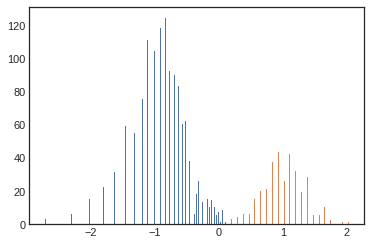

In [158]:
plt.hist(data_.loc[node.left_indices, 'CD3-1'],bins=100)
plt.hist(data_.loc[node.right_indices, 'CD3-1'],bins=100)


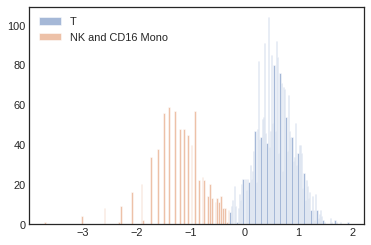

In [59]:
plt.hist(data_.loc[traversal.get_node(4).indices,'CD3-1'],bins=100,alpha=0.5,label='T')
plt.hist(data_.loc[traversal.get_node(3).indices,'CD3-1'],bins=100,alpha=0.5,label='NK and CD16 Mono')
plt.legend()
plt.show()

In [88]:
from scipy.stats import multivariate_normal, norm
def assign_GMM(sample, mean_list, cov_list, weight, if_log=False, marker_list=None, confidence_threshold=0, throw=True):
    """confidence_threshold is used to not assign dots with low confidence to each group:
        a big confidence_threshold represents a more strict standard for confidential dots"""
    confidence_threshold = (1-confidence_threshold) / len(weight) * 2
    index = sample.index
    # sample = np.array(sample)
    weight = np.array(weight)
    if if_log:
        type_num = np.log(weight/sum(weight))
    else:
        type_num = weight/sum(weight)
    
    p_prior = np.zeros(shape=(len(sample),len(weight)))
    for i in range(len(weight)):
        if if_log:
            # print('sample_null',sample.loc[:,marker_list].isnull().any().any(), 'mean_null', mean_list[i][marker_list].isnull().any().any(), 'cov_null', cov_list[i].loc[marker_list,marker_list].isnull().any().any())
            # print('marker len:',marker_list[i].shape[0])
            p_prior[:,i] = multivariate_normal.logpdf(np.array(sample.loc[:,marker_list]), mean=np.array(mean_list[i][marker_list]), cov=np.array(cov_list[i].loc[marker_list,marker_list]),allow_singular=True)
            p_prior[:,i] = p_prior[:,i] + type_num[i]
            
        else:
            p_prior[:,i] = multivariate_normal.pdf(np.array(sample.loc[:,marker_list]), mean=np.array(mean_list[i][marker_list]), cov=np.array(cov_list[i].loc[marker_list,marker_list]),allow_singular=True)   
            p_prior[:,i] = p_prior[:,i] * type_num[i]
    # p_prior = -p_prior 
    
    p_post = p_prior / (p_prior.sum(axis=1)[:,np.newaxis] )
    pred_label = np.argmin(p_post,axis=1)
    if throw:
        pred_label = [pred_label[i] if p_post[i,pred_label[i]]<confidence_threshold else -1 for i in range(len(pred_label)) ]
        print('throw')
    # print(p_post[:10,:])
    # print(pred_label[:10])
    pred_label = pd.Series(data=pred_label,index=index)    
    return pred_label

In [103]:
leaf_list = [node for node in traversal.nodelist if node.stop!=None]
marker_list = [node.marker[i] for node in leaf_list for i in range(len(node.marker))]
mean_list = [node.mean for node in leaf_list] 
cov_list = [node.cov for node in leaf_list]
w_list = [node.weight for node in leaf_list] 
marker_list = list(set(marker_list))
y = np.apply_along_axis(lambda x: np.log(x+1) - np.mean(np.log(x+1)),0,data)
x = pd.DataFrame(y, index=data.index, columns=data.columns)
new_label = assign_GMM(x, mean_list, cov_list, w_list, marker_list=marker_list, if_log=True, confidence_threshold=0, throw=False)
for i in range(len(leaf_list)):
    node = leaf_list[i]
    sub_data = data[new_label==i]
    node.indices = sub_data.index.tolist()

/tmp/ipykernel_2798123/1560725178.py:10: RuntimeWarning: divide by zero encountered in log
  type_num = np.log(weight/sum(weight))
/tmp/ipykernel_2798123/1560725178.py:27: RuntimeWarning: invalid value encountered in true_divide
  p_post = p_prior / (p_prior.sum(axis=1)[:,np.newaxis] )


In [104]:
label = pd.DataFrame({'GEM':data.index,'Label':[None]*len(data)},index=data.index)
for i in range(len(leaf_list)):
    if leaf_list[i].key == ('leaf',):
        label.loc[leaf_list[i].indices,'Label'] = str(leaf_list[i].ind)+'_'+'_'.join(leaf_list[i].key) 

In [105]:
label.to_csv('../output/3_2_/' + '/new_leaf_labels.csv')

In [101]:
ind = 0
def dfs(node,id):
    if node.key == ('leaf',):
        node.indices = leaf_list[i].indices
        if node.ind != leaf_list[i].ind:
            print(node.ind, leaf_list[i].ind)
        ind = ind +1
        return node       
    else:
        
        node.left = dfs(node.left,id)
        node.right = dfs(node.right,id)
        return node

new_tree = dfs(tree,0)

11 30


UnboundLocalError: local variable 'ind' referenced before assignment

In [ ]:
def cutleaf_dfs(node, cutID, cut=False):
    if node.ind in cutID:
        return 
    
    if node.key == ('leaf',):
        if cut == True:
            node.key = ('cutleaf',)
        return node       
    else:
        if cut:
            node.key = ('cutleaf',)
        if node.ind in cutID:
            node.key = ('leaf',)
            cut = True
        
        print(node.ind)
        node.left = cutleaf_dfs(node.left, cutID, cut=cut)
        node.right = cutleaf_dfs(node.right, cutID, cut=cut)
        if node.left == None:
            node = node.right
        if node.right == None:
            node = node.left
        return node

In [28]:
def finetune_dfs(node, cutID=[], removeID=[], cut=False):
    if node == None:
        return node
    # ind = node.ind
    node.ind = [i for i in range(len(traversal.nodename)) if len(traversal.nodelist[i].indices)==len(node.indices)][0]
    # if node.ind == 4 or node.ind == 9 or ind==4 or ind==9:
        # print(ind,node.ind)
    print(node.ind,node.key)
    # if node.ind == 7:
    #     node.indices = node.indices +  traversal.get_node(11).indices
    # if node.ind == 12:
    #     node.indices = node.indices +  traversal.get_node(25).indices
    # if node.ind == 36:
    #     node.indices = node.indices +  traversal.get_node(20).indices 

    if node.ind in removeID:
        node.key = ('remove',)
        return node
    if node.key == ('leaf',):
        if cut == True:
            node.key = ('cutleaf',)
        return node       
    else:
        if cut:
            node.key = ('cutleaf',)
        if node.ind in cutID:
            node.key = ('leaf',)
            cut = True
            print('newleaf',node.ind)
            node.left = None
            node.right = None
            return node
        
        
        node.left = finetune_dfs(node.left, cutID, removeID=removeID, cut=cut)
        node.right = finetune_dfs(node.right, cutID, removeID=removeID, cut=cut)
        
        if node.left.key == ('remove',) and node.right.key == ('remove',):
            node.key = ('remove',)
            return node
        if node.left.key == ('remove',):
            node = node.right
        if node.right.key == ('remove',):
            node = node.left
        return node

In [61]:
def finetune_dfs(node, cutID, removeID=[], cut=False):

    if node.ind in removeID:
        return 
    
    if node.key == ('leaf',):
        if cut == True:
            node.key = ('cutleaf',)
        return node       
    else:
        if cut:
            node.key = ('cutleaf',)
        if node.ind in cutID:
            node.key = ('leaf',)
            cut = True
        
        print(node.ind)
        node.left = finetune_dfs(node.left, cutID, cut=cut)
        node.right = finetune_dfs(node.right, cutID, cut=cut)

        if node.left == None:
            node = node.right
        if node.right == None:
            node = node.left
        return node

In [29]:
newtree = finetune_dfs(tree, cutID=[6],removeID=[3])#, cutID=[8, 9, 14,25,27,28,24]

0 ('CD185',)
1 ('CD196',)
3 ('leaf',)
4 ('CCR10',)
5 ('CD196',)
7 ('CD194',)
11 ('leaf',)
12 ('leaf',)
8 ('CD194',)
13 ('leaf',)
14 ('leaf',)
6 ('CD185',)
newleaf 6
2 ('leaf',)


In [30]:
visualize_tree(newtree,data_,'../output/'+id,'/cuttree',compact=True)
# visualize_tree(newtree,data_,'../data/4tumor/adt_output','/cuttree',compact=True)
    
f = open('../output/'+id+'/cuttree.pickle','wb')
# f = open('../data/4tumor/adt_output/cuttree.pickle','wb')
pickle.dump(newtree,f)
f.close()

newtravel = BTreeTraversal(newtree)
newleaf = newtravel.get_leaf_label()
leaves_labels = newtravel.get_leaf_label()
# leaves_labels.to_csv('../data/4tumor/adt_output/cut_leaf_labels.csv')
leaves_labels.to_csv('../output/' +id+ '/cut_leaf_labels.csv')

/home/xinzhu/Desktop/git-test/CITE-sortV2


In [21]:
newtravel.nodename

['0_CD14',
 '1_CD4',
 '2_leaf',
 '3_CD8a',
 '4_CD45RA',
 '5_CD45RA',
 '6_PD-1',
 '7_leaf',
 '8_CD3',
 '9_leaf',
 '10_CD19',
 '11_CD127',
 '12_leaf',
 '13_CD45RO_TIGIT',
 '14_TIGIT',
 '15_CD3',
 '16_leaf',
 '17_leaf',
 '18_leaf',
 '19_leaf',
 '20_leaf',
 '21_CD127_PD-1',
 '22_leaf',
 '23_leaf',
 '24_leaf',
 '25_leaf',
 '26_leaf']

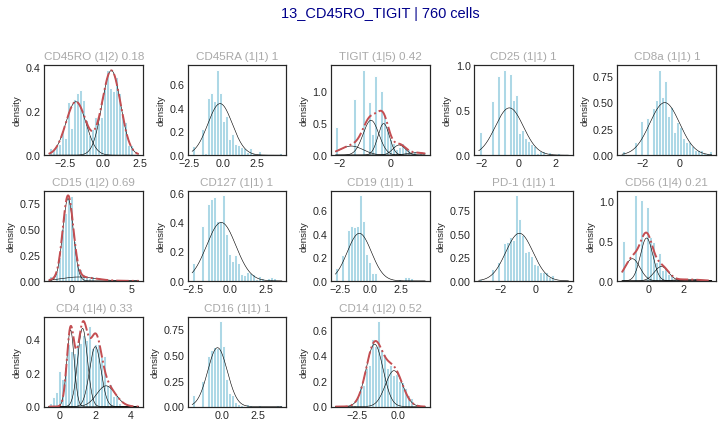

In [34]:
node_ID = 13

newtravel.plot_node(data_,node_ID,viz_dim=1)

In [51]:
newtravel.get_node(19).key

('leaf',)

In [ ]:
import diptest
diptest.dipstat(data.loc[node.indices,'CD8a'])
# len(data.loc[node.indices,'CD158'])

In [ ]:
traversal.plot_node_umap(data, nodeID=6)

In [ ]:
traversal.plot_node_2dim_new(data, 7, 'CD27', 'CD16')
# traversal.plot_node_2dim_new(data, 20, 'CD8a', 'CD4')
# traversal.plot_node_2dim_new(data, 2, 'CD4-1', 'CD19')

In [ ]:
score_ll = traversal.get_ll(4)
print('likelyhood gain:')
for key,value in score_ll.items():
    print(key,round(value,3))

## visualize the key marker in a certain node
#### the node ID is just the number before the node name in tree.pdf

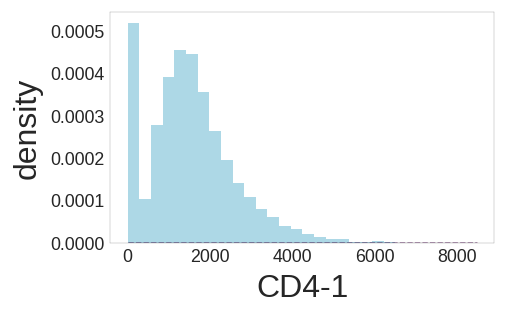

In [35]:
plot_keymarker(data,traversal,node_ID=1,dpi=128)

In [ ]:
from scipy.stats import multivariate_normal, norm
import numpy as np

def assign_GMM(sample, mean_list, cov_list, weight, if_log=False, marker_list=None):
    # print(cov_list)
    index = sample.index
    # sample = np.array(sample)
    weight = np.array(weight)
    if if_log:
        type_num = np.log(weight/sum(weight))
    else:
        type_num = weight/sum(weight)
    
    p_prior = np.zeros(shape=(len(sample),len(weight)))
    for i in range(len(weight)):
        if if_log:
            # print(i)
            p_prior[:,i] = multivariate_normal.logpdf(np.array(sample.loc[:,marker_list]), mean=np.array(mean_list[i][marker_list]), cov=np.array(cov_list[i].loc[marker_list,marker_list]),allow_singular=True)
            p_prior[:,i] = p_prior[:,i] + type_num[i]
            
        else:
            
            # print([cov_list[i][j,j] for j in range(len(cov_list[i]))])
            # print(sample.loc[:,marker_list[i]])
            # print(mean_list[i])
            # print(cov_list[i])
            p_prior[:,i] = multivariate_normal.pdf(np.array(sample.loc[:,marker_list[i]]), mean=np.array(mean_list[i]), cov=np.array(cov_list[i]))   
            p_prior[:,i] = p_prior[:,i] * type_num[i]
    # p_prior = -p_prior 
    
    p_post = p_prior / (p_prior.sum(axis=1)[:,np.newaxis] )
    pred_label = np.argmin(p_post,axis=1)
    # print(p_prior[:10,:])
    # print(pred_label[:10])
    pred_label = pd.Series(data=pred_label,index=index)
    return pred_label

In [ ]:
leaf_list = traversal.nodelist.copy()
leaf_list.pop(0)
leaf_list.pop(0)
leaf_list.pop(1)

In [ ]:
node = traversal.get_node(3)
mean_list = [node.mean for node in leaf_list] 
cov_list = [node.cov for node in leaf_list]
w_list = [node.weight for node in leaf_list]
simulator = pd.read_csv('../simulator/ADT_simulator_9_10.csv', sep=',', index_col=0, header=0)
raw_label = assign_GMM(simulator, mean_list, cov_list, w_list, if_log=True,marker_list=['CD4-1','CD19','CD16','CD8'])
add_label = assign_GMM(simulator, mean_list, cov_list, w_list, if_log=True,marker_list=['CD4-1','CD19','CD16','CD8','CD3-1'])
#### 尝试用所有cutof<0.5的feature来assign，相当于是一个高维的gate

In [ ]:
import umap
import umap.plot
import matplotlib.pyplot as plt

mapper = umap.UMAP().fit(simulator)
umap.plot.points(mapper, labels=raw_label)
umap.plot.points(mapper, labels=add_label)

In [ ]:
raw_label.iloc[20675:].value_counts()
# add_label.iloc[20675:].value_counts()

In [ ]:
# add_label.index = simulator.index
simulator[raw_label==3].to_csv('../simulator/ADT_simulator_9_11.csv')

In [ ]:
from CITEsort.Visualize import visualize_2dim

visualize_2dim(simulator[raw_label==3]['CD3-1'],simulator[raw_label==3]['CD8'],raw_label[raw_label==3])
visualize_2dim(simulator[add_label==3]['CD3-1'],simulator[add_label==3]['CD8'],add_label[add_label==3])

In [ ]:
keys = []
for i in range(28):
    node = traversal.get_node(i)
    if list(node.key) != 'leaf':
        print(node.key)

In [ ]:
'IgD',
'CD26-1',
'CD72',
'CD4-1',
'CD27', 'CD8a
'CD8a',
'CD244',
'CD4-1',
'CD27',
'CD244',
'CD158', 'CD21',
'CD3-1'